# Table of Contents:

1. Introduction
2. Importing Libraries
3. Rating Distribution
4. Map Visualization
    1. Global Perspective
    2. North America, Europe Regions, and South America
    3. City-Level View (Las Vegas, Phoenix, Stuttgart, Edinburgh)
    4. Ratings in Las Vegas
5. In-Depth Analysis of Reviews
    1. Top 10 Reviewers
    2. Tracking Top Users
    3. User Summary Statistics
6. Registration Data
7. User Network (Graph Analysis)
    1. Global Graph
    2. Subgraph - Stuttgart Region
8. Network Visualization:
    1. Spring Layout
    2. Circular/Circos Layout
    3. Random Layout
    4. Kamada-Kawai Layout
9. Community Detection

## Introduction

Yelp is a company that provides crowdsourced reviews and online reservation services for local businesses. Founded in 2004 by former PayPal employees, Yelp allows users to rate and review various types of local businesses on its platform, including restaurants, cafes, hotels, shops, and more. Users can explore reviews and ratings from others on Yelp, helping them make more informed decisions about where to spend their money.

The Yelp review dataset is a collection of detailed review data from the Yelp platform, including ratings, review text, user information, business information, and more. By analyzing this data, valuable insights can be gained into user preferences and the strengths and weaknesses of different businesses, allowing for more targeted advice and recommendations for both local businesses and users.

This project aims to analyze the Yelp review dataset, explore trends, patterns, and correlations, and extract valuable information from the data. The analysis results will be presented using methods such as visualization, statistics, and network analysis. Through this data analysis, we can gain deeper insights into user behavior, business performance, and social networks within the Yelp review dataset, ultimately providing better services and recommendations for the Yelp platform and its users.


## Importing

In [ ]:
pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [ ]:
# Import basic packages
import numpy as np
import pandas as pd

# Import miscellaneous packages
import gc  # Garbage collection, used for memory management
import time  # Time module, used for tracking time
import warnings  # Warning handling module, used to filter warning messages

# Import data visualization packages
import matplotlib.pyplot as plt  # Matplotlib library, used for static plotting
import seaborn as sns  # Seaborn library, used for statistical plotting
import matplotlib.gridspec as gridspec  # Matplotlib grid layout library, used for creating complex layouts
import plotly.offline as pyo  # Plotly offline library, used for interactive plotting
from plotly.graph_objs import *  # Plotly library, used for interactive plotting
import plotly.graph_objs as go  # Plotly library, used for interactive plotting

# Import mapping-related packages
import imageio  # Image processing library, used for handling map images
import folium  # Folium mapping library, used for creating interactive maps
import folium.plugins as plugins  # Folium plugins library, used for adding map plugins
from mpl_toolkits.basemap import Basemap  # Basemap mapping library, used for plotting maps

# Import graph/network-related packages
import networkx as nx  # NetworkX graph library, used for constructing and analyzing graph networks
import heapq  # Heap queue module, used to get the top n elements from lists or dictionaries

# Settings
start_time = time.time()  # Get the start time, used for tracking time
color = sns.color_palette()  # Set color palette
sns.set_style("darkgrid")  # Set Seaborn's plotting style
warnings.filterwarnings("ignore")  # Ignore warning messages
pyo.init_notebook_mode()  # Initialize Plotly's notebook mode, used to display interactive plots in Jupyter Notebook

### `yelp_tip.csv`

This dataset contains information on tips left by Yelp users on business pages and usually includes the following fields:

1. `user_id`: The user ID of the person who left the tip.
2. `business_id`: The business ID receiving the tip.
3. `text`: The content of the tip.
4. `date`: The date and time the tip was posted.
5. `compliment_count`: The number of compliments the tip received.
6. `type`: The type of data entry, typically "tip" indicating a tip.
7. `cool`: The "cool" votes that the tip received from users.
8. `funny`: The "funny" votes that the tip received from users.
9. `useful`: The "useful" votes that the tip received from users.

These fields provide information on the tips posted by Yelp users on business pages, including user ID, business ID, tip content, posting date, compliment count, and user votes. This data can be used to explore user behavior and interactions on Yelp, understand user evaluations and feedback for businesses, and help businesses and the Yelp platform improve and optimize their services.

### `yelp_business.csv`

This dataset contains information on businesses listed on Yelp and includes the following fields:

1. `business_id`: The unique identifier for the business.
2. `name`: The name of the business.
3. `address`: The address of the business.
4. `city`: The city where the business is located.
5. `state`: The state or province where the business is located.
6. `postal_code`: The postal code of the business.
7. `latitude`: The latitude of the business's location.
8. `longitude`: The longitude of the business's location.
9. `stars`: The business's rating (an integer between 1 and 5).
10. `review_count`: The number of reviews for the business.
11. `is_open`: Indicates whether the business is currently open (0 for closed, 1 for open).
12. `categories`: The categories of the business, usually separated by commas.
13. `attributes`: Other attribute information of the business, typically represented as key-value pairs.
14. `hours`: The business's operating hours, usually represented as key-value pairs.

These fields provide basic information about Yelp-listed businesses, including name, address, location details, rating, review count, operating status, categories, attributes, and operating hours. This data can be used to analyze business performance on Yelp, explore differences and similarities between businesses, perform location analysis, and gain insights into the Yelp business ecosystem and consumer behavior.

### `yelp_business_hours.csv`

This dataset contains information on the operating hours of businesses listed on Yelp and includes the following fields:

1. `business_id`: The unique identifier for the business, corresponding to the `business_id` field in `yelp_business.csv`.
2. `monday`: The business’s operating hours on Monday.
3. `tuesday`: The business’s operating hours on Tuesday.
4. `wednesday`: The business’s operating hours on Wednesday.
5. `thursday`: The business’s operating hours on Thursday.
6. `friday`: The business’s operating hours on Friday.
7. `saturday`: The business’s operating hours on Saturday.
8. `sunday`: The business’s operating hours on Sunday.

Operating hours are usually represented in hours, such as "9:00-17:00" indicating an operating period from 9:00 AM to 5:00 PM. Fields for which no operating hours are provided are typically left empty.

These fields provide information about the daily operating hours of Yelp businesses. This data can be used to analyze business operating trends, compare the operating hours of different businesses, and perform analyses of consumer activity during different time periods. This data can be combined with other business information from the `yelp_business.csv` dataset to gain a more comprehensive understanding of business operations.

### `yelp_checkin.csv`

This dataset contains information on user check-ins at businesses listed on Yelp and includes the following fields:

1. `business_id`: The unique identifier for the business, corresponding to the `business_id` field in `yelp_business.csv`.
2. `date`: The date of the check-in, formatted as "YYYY-MM-DD".
3. `time`: The time of the check-in, formatted as "HH:MM:SS".

This dataset records the dates and times when Yelp users checked in at businesses. This data can be used to analyze user check-in activity, the distribution of check-in times, and check-in patterns across different businesses. It can help businesses better understand user behavior and optimize operational strategies.

This data can be combined with other business information from the `yelp_business.csv` dataset to gain a more comprehensive understanding of user check-ins and support data-driven business decisions.

### `yelp_user.csv`

This dataset contains information about Yelp users and includes the following fields:

1. `user_id`: The unique identifier for the user.
2. `name`: The user's nickname or username.
3. `review_count`: The number of reviews posted by the user.
4. `yelping_since`: The date the user joined Yelp, formatted as "YYYY-MM-DD".
5. `friends`: The user’s list of friends, represented as a comma-separated list of user IDs.
6. `useful`: The number of times the user was voted as "useful" by others.
7. `funny`: The number of times the user was voted as "funny" by others.
8. `cool`: The number of times the user was voted as "cool" by others.
9. `fans`: The number of fans following the user.
10. `elite`: The user’s elite membership status, indicating whether they have been a Yelp Elite member, along with specific years.
11. `average_stars`: The user’s average star rating.
12. `compliment_hot`: The number of "hot" compliments the user has received.
13. `compliment_more`: The number of "more" compliments the user has received.
14. `compliment_profile`: The number of "profile" compliments the user has received.
15. `compliment_cute`: The number of "cute" compliments the user has received.
16. `compliment_list`: The number of "list" compliments the user has received.
17. `compliment_note`: The number of "note" compliments the user has received.
18. `compliment_plain`: The number of "plain" compliments the user has received.
19. `compliment_cool`: The number of "cool" compliments the user has received.
20. `compliment_funny`: The number of "funny" compliments the user has received.
21. `compliment_writer`: The number of "writer" compliments the user has received.
22. `compliment_photos`: The number of "photos" compliments the user has received.


In [ ]:
from google.colab import drive

# Connect to Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd  # import pandas for data processing

dataset_path = '/content/drive/MyDrive/Jerry_Huang_DS_Portfolio/Yelp/'
# Import yelp_business.csv dataset
business = pd.read_csv(dataset_path + "yelp_business.csv")  # Use pd.read_csv() to read data from the CSV file
# business_attributes = pd.read_csv("../data/yelp_business_attributes.csv")  # You can add other dataset import statements, like yelp_business_attributes.csv

# Import yelp_business_hours.csv dataset
business_hours = pd.read_csv(dataset_path + "yelp_business_hours.csv")

# Import yelp_checkin.csv dataset
check_in = pd.read_csv(dataset_path + "yelp_checkin.csv")

# Import yelp_review.csv dataset
reviews = pd.read_csv(dataset_path + "yelp_review.csv")

# Import yelp_tip.csv dataset
tip = pd.read_csv(dataset_path + "yelp_tip.csv")

# Import yelp_user.csv dataset
user = pd.read_csv(dataset_path + "yelp_user.csv")

# Calculate the time taken to import the datasets
end_time = time.time()  # Get the current time
print("Took", end_time - start_time, "s")  # Output the time taken to import the datasets

Took 123.72110366821289 s


In [ ]:
business.dropna()

business_id                          name  \
6       kCoE3jvEtg6UVz5SOD3GVw                  "BDJ Realty"   
12      xcgFnd-MwkZeO5G2HQ0gAQ       "T & T Bakery and Cafe"   
14      fNMVV_ZX7CJSDWQGdOM8Nw  "Showmars Government Center"   
15      l09JfMeQ6ynYs5MCJtrcmQ              "Alize Catering"   
20      lHYiCS-y8AFjUitv6MGpxg                   "Starbucks"   
...                        ...                           ...   
174549  iR1CIWFZOlfndjXn9fHflQ            "Last Drop Tavern"   
174552  9ouC6BpmjFpLfHeQnLQqng        "9 Dragons Fight Shop"   
174556  n9a-3YhibkMDUEgncIivHg                  "L'Occitane"   
174560  fBUoQ3WCyQX9sMWteZfI3w               "Copie Express"   
174561  kLFm_kehXNZkUc1oa2-Eaw        "Nuno's Churrasqueira"   

              neighborhood                         address       city state  \
6                Summerlin      "2620 Regatta Dr, Ste 102"  Las Vegas    NV   
12         Markham Village              "35 Main Street N"    Markham    ON   
14                  Uptown                  "600 E 4th St"  Charlotte    NC   
15      Yonge and Eglinton                 "2459 Yonge St"    Toronto    ON   
20         Liberty Village               "85 Hanna Avenue"    Toronto    ON   
...                    ...                             ...        ...   ...   
174549         Grassmarket  "74/78, Grassmarket, Old Town"  Edinburgh   EDH   
174552            Westside    "3375 S Decatur Blvd, Ste 7"  Las Vegas    NV   
174556     South Summerlin           "1980 Festival Pl Dr"  Las Vegas    NV   
174560         Ville-Marie          "680 Rue Sherbrooke O"   Montreal    QC   
174561    Brockton Village              "1560 Dundas St W"    Toronto    ON   

       postal_code   latitude   longitude  stars  review_count  is_open  \
6            89128  36.207430 -115.268460    4.0             5        1   
12         L3P 1X3  43.875177  -79.260153    4.0            38        1   
14           28202  35.221647  -80.839345    3.5             7        1   
15         M4P 2H6  43.711399  -79.399339    3.0            12        0   
20         M6K 3S3  43.639863  -79.419533    4.0            21        1   
...            ...        ...         ...    ...           ...      ...   
174549     EH1 2JR  55.947855   -3.195551    3.5            60        1   
174552       89102  36.128780 -115.208990    5.0             5        1   
174556       89135  36.150022 -115.333169    3.5             3        1   
174560     H3A 2M7  45.504628  -73.573533    3.0             4        1   
174561     M6K 1T5  43.649789  -79.433928    3.0             4        1   

                                               categories  
6       Real Estate Services;Real Estate;Home Services...  
12                                   Bakeries;Bagels;Food  
14                     Restaurants;American (Traditional)  
15                             Italian;French;Restaurants  
20                                      Food;Coffee & Tea  
...                                                   ...  
174549                                Bars;Nightlife;Pubs  
174552  Martial Arts;Sports Wear;Men's Clothing;Sporti...  
174556                            Beauty & Spas;Skin Care  
174560                   Printing Services;Local Services  
174561      Food;Ethnic Food;Specialty Food;Imported Food  

[67741 rows x 13 columns]

### Rating Distribution


#### The following code uses the seaborn library's barplot() function to create a bar chart that shows the distribution of businesses based on different star ratings.

In [ ]:
# Since the smallest granularity in the 'business' dataset is 'business_id', which means other columns are calculated based on the characteristics of 'business_id',
# we don't need to use group_by() for calculations. We can directly use value_counts() to calculate how many times each star rating appears.
# business['stars'].value_counts(normalize=True).sort_index()
business['stars'].value_counts().sort_index()

stars
1.0     3788
1.5     4303
2.0     9320
2.5    16148
3.0    23142
3.5    32038
4.0    33492
4.5    24796
5.0    27540
Name: count, dtype: int64

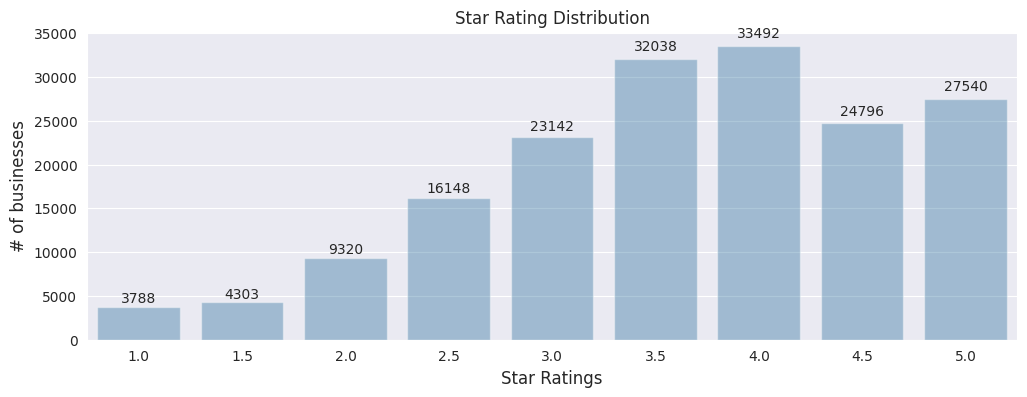

In [ ]:
# Get the distribution of star ratings
x = business['stars'].value_counts()  # Use value_counts() to get the count of each star rating
x = x.sort_index()  # Sort the count results by index (star ratings)

# Plotting the bar plot
plt.figure(figsize=(12,4))  # Set the figure size
ax = sns.barplot(x=x.index, y=x.values, alpha=0.4)  # Use seaborn's barplot function to create a bar chart; x is the series index (x-axis), and y is the series values (y-axis), alpha controls bar transparency
plt.title("Star Rating Distribution")  # Set the chart title
plt.ylabel('# of businesses', fontsize=12)  # Set the y-axis label
plt.xlabel('Star Ratings', fontsize=12)  # Set the x-axis label

# Add labels to the bars
rects = ax.patches  # Get the bar objects
labels = x.values  # Get the count values to display as labels
for rect, label in zip(rects, labels):  # Iterate over the bars and their corresponding labels using zip()
    height = rect.get_height()  # Get the height of each bar
    ax.text(rect.get_x() + rect.get_width()/2, height*1.02, label, ha='center', va='bottom')  # Add a text label above each bar
# rect.get_x() gives the left position of each bar; adding rect.get_width()/2 centers the label horizontally. Multiplying height by 1.02 places the label slightly above the bar. The 'label' is the content to display, and ha='center', va='bottom' ensure the text is centered and aligned properly.

plt.show()  # Display the plot


#### The following code uses seaborn's barplot() function to create a bar chart, showing the distribution of popular business categories on Yelp and their corresponding counts.

In [ ]:
'abc;b;cd'.split(';')

['abc', 'b', 'cd']

In [ ]:
business['categories']

0         Dentists;General Dentistry;Health & Medical;Or...
1         Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2         Departments of Motor Vehicles;Public Services ...
3                                   Sporting Goods;Shopping
4         American (New);Nightlife;Bars;Sandwiches;Ameri...
                                ...                        
174562                               Car Dealers;Automotive
174563                                Body Shops;Automotive
174564        Home Services;Property Management;Real Estate
174565                  Spray Tanning;Tanning;Beauty & Spas
174566                 Drugstores;Shopping;Health & Medical
Name: categories, Length: 174567, dtype: object

In [ ]:
# We apply .str to call string methods split and separate each category with ";". Then, we apply explode() to transform each element of a list-like column (e.g., a column containing lists, tuples, or strings) into a row.
business['categories'].str.split(';').explode().value_counts().head(10)

categories
Restaurants         54618
Shopping            27971
Food                24777
Beauty & Spas       17014
Home Services       16205
Health & Medical    14230
Nightlife           12154
Local Services      11232
Automotive          11052
Bars                10563
Name: count, dtype: int64

There are 59106 different types/categories of businesses on Yelp!


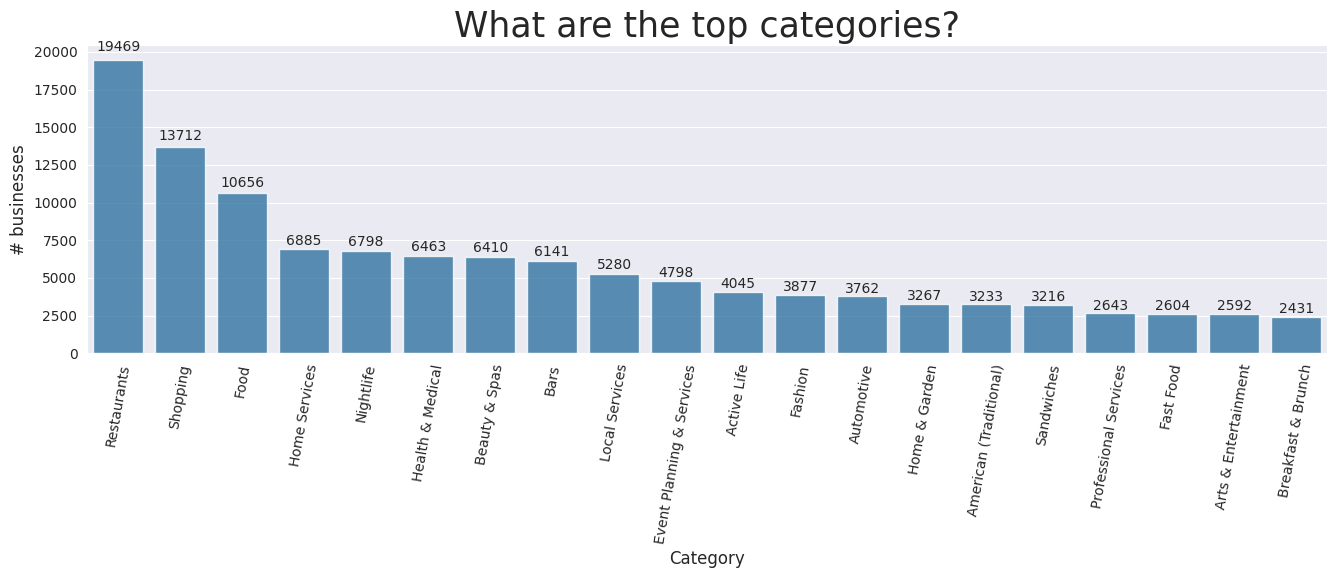

In [ ]:
# Get all business categories
business_cats = ' '.join(business['categories'])  # Combine all business categories into one string

# Split the categories into individual categories and store them in a DataFrame
cats = pd.DataFrame(business_cats.split(';'), columns=['category'])  # Split the categories by semicolon and create a DataFrame
x = cats['category'].value_counts()  # Use value_counts() to get the count for each category
print("There are", len(x), "different types/categories of businesses on Yelp!")  # Output the number of distinct business categories

# Prepare the data for plotting the bar chart
x = x.sort_values(ascending=False)  # Sort the counts in descending order
x = x.iloc[0:20]  # Select the top 20 categories for the chart

# Plot the bar chart
plt.figure(figsize=(16,4))  # Set the figure size
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)  # Use seaborn's barplot function to create the bar chart
plt.title("What are the top categories?", fontsize=25)  # Set the chart title
locs, labels = plt.xticks()  # Get the x-axis tick positions and labels
plt.setp(labels, rotation=80)  # Rotate the x-axis labels for better readability
plt.ylabel('# businesses', fontsize=12)  # Set the y-axis label
plt.xlabel('Category', fontsize=12)  # Set the x-axis label

# Add labels to the bars
rects = ax.patches  # Get the bar objects
labels = x.values  # Get the count values to display as labels
for rect, label in zip(rects, labels):  # Iterate over the bars and their corresponding labels
    height = rect.get_height()  # Get the height of each bar
    ax.text(rect.get_x() + rect.get_width()/2, height*1.02, label, ha='center', va='bottom')  # Add a text label above each bar

plt.show()  # Display the plot

## Map Section

### Analysis of Review Source Locations

In the map section, we analyze the `geographic locations` of various `businesses` on Yelp.

1. First, we look at a `global view` of Yelp businesses.
2. Then, we zoom in on the two `most concentrated regions` (North America and Europe).
3. Explore the `cities with the most reviews`.
4. Visualize the `top two` cities.

### Global View


注释：在这段代码中，我们使用了Matplotlib和Basemap库来创建一个基础的世界地图。首先，我们导入了需要的库。然后，我们创建了一个指定大小的图像窗口。接着，我们使用正投影（ortho projection）来生成地球型版本的地图。我们通过指定的颜色代码来填充大陆和海洋的颜色。然后，我们绘制了国家的边界线，并使用散点图的方式在地图上标示出商家的经纬度位置。最后，我们为地图添加了一个标题并显示出来。

In this code, we use Matplotlib and the Basemap library to create a basic world map. First, we import the necessary libraries. Then, we create a figure window with a specified size. Next, we use the orthographic (ortho) projection to generate a globe-like version of the map. We fill the continents and oceans with the specified color codes. After that, we draw country borders and plot the businesses' latitude and longitude locations on the map using a scatter plot. Finally, we add a title to the map and display it.


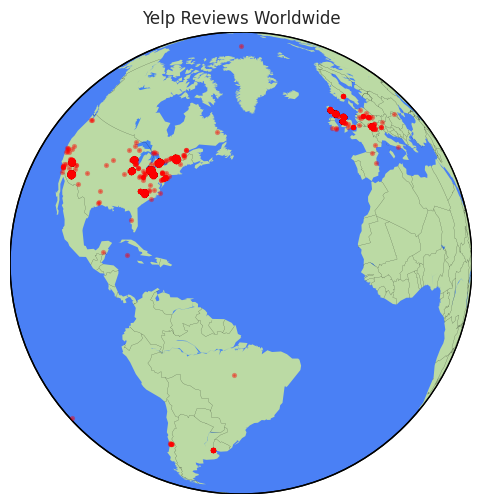

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a figure window with a specified size
plt.figure(1, figsize=(15,6))

# Generate a globe-like version of the map using orthographic projection
m1 = Basemap(projection='ortho', lat_0=20, lon_0=-50)

# Fill the continents and oceans with the specified color codes
m1.fillcontinents(color='#bbdaa4', lake_color='#4384f3')

# Add ocean boundaries with the specified color
m1.drawmapboundary(fill_color='#4a80f5')

# Draw country borders and set the line width and color
m1.drawcountries(linewidth=0.1, color="black")

# Plot the businesses' latitude and longitude positions on the map using a scatter plot
mxy = m1(business["longitude"].tolist(), business["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="red", lw=2, alpha=0.4, zorder=5)

# Add a title to the map
plt.title("Yelp Reviews Worldwide")

# Display the map
plt.show()

### North America and Europe

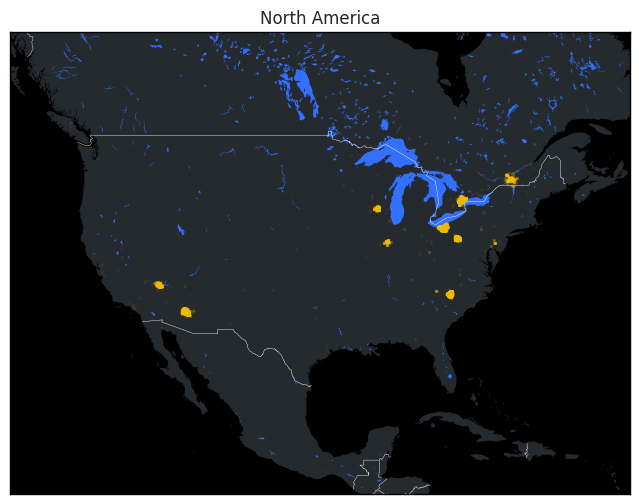

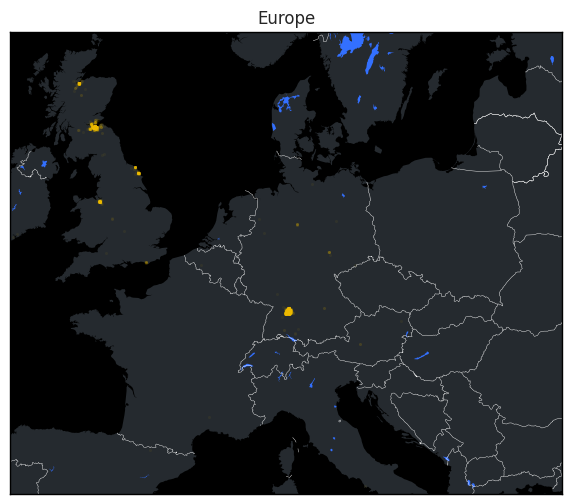

In [ ]:
# Filter data for North America region
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715, 56.395664

# Create a filter
idx_NA = (business["longitude"] > lon_min) & \
         (business["longitude"] < lon_max) & \
         (business["latitude"] > lat_min) & \
         (business["latitude"] < lat_max)
# Apply the filter to subset the data
NA_business = business[idx_NA]

# Initialize the plot
plt.figure(figsize=(12, 6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#252a2f', lake_color='#3370ff')  # Dark gray land, blue lakes
m2.drawmapboundary(fill_color='#000000')  # Black background
m2.drawcountries(linewidth=0.3, color="w")  # White lines to mark country borders

# Plot the data
mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#ffcc00", lw=0, alpha=0.05, zorder=5)

plt.title("North America")

# Filter data for Europe region
lon_min, lon_max = -8.613281, 26.699219
lat_min, lat_max = 40.488737, 59.204064

# Create a filter
idx_euro = (business["longitude"] > lon_min) & \
           (business["longitude"] < lon_max) & \
           (business["latitude"] > lat_min) & \
           (business["latitude"] < lat_max)
# Apply the filter to subset the data
euro_business = business[idx_euro]

# Initialize the plot
plt.figure(figsize=(12, 6))
m3 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m3.fillcontinents(color='#252a2f', lake_color='#3370ff')  # Dark gray land, blue lakes
m3.drawmapboundary(fill_color='#000000')  # Black background
m3.drawcountries(linewidth=0.3, color="w")  # White lines to mark country borders

# Plot the data
mxy = m3(euro_business["longitude"].tolist(), euro_business["latitude"].tolist())
m3.scatter(mxy[0], mxy[1], s=5, c="#ffcc00", lw=0, alpha=0.05, zorder=5)

plt.title("Europe")
plt.show()

### South America

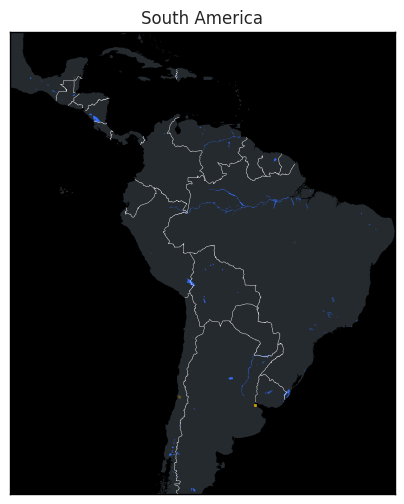

In [ ]:
# Filter data for South America region
lon_min, lon_max = -100.000000, -34.793000
lat_min, lat_max = -45.978000, 25.500000

# Create a filter
idx_SA = (business["longitude"] > lon_min) & \
         (business["longitude"] < lon_max) & \
         (business["latitude"] > lat_min) & \
         (business["latitude"] < lat_max)
# Apply the filter to subset the data
SA_business = business[idx_SA]

# Initialize the plot
plt.figure(figsize=(12, 6))
m4 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m4.fillcontinents(color='#252a2f', lake_color='#3370ff')  # Dark gray land, blue lakes
m4.drawmapboundary(fill_color='#000000')  # Black background
m4.drawcountries(linewidth=0.3, color="w")  # White lines to mark country borders

# Plot the data
mxy = m4(SA_business["longitude"].tolist(), SA_business["latitude"].tolist())
m4.scatter(mxy[0], mxy[1], s=5, c="#ffcc00", lw=0, alpha=0.05, zorder=5)

plt.title("South America")
plt.show()

 ### Caribbean region

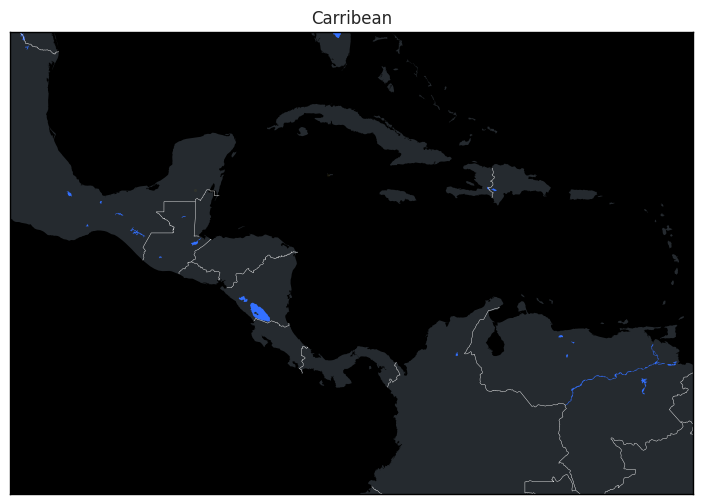

In [ ]:
lon_min, lon_max = -99.999999, -59.999999
lat_min, lat_max = 1.000000, 27.000000

idx_carr = (business["longitude"] > lon_min) & \
           (business["longitude"] < lon_max) & \
           (business["latitude"] > lat_min) & \
           (business["latitude"] < lat_max)
carr_business = business[idx_carr]

plt.figure(figsize=(12, 6))
m5 = Basemap(
    projection='merc',
    llcrnrlat=lat_min,
    urcrnrlat=lat_max,
    llcrnrlon=lon_min,
    urcrnrlon=lon_max,
    lat_ts=35,
    resolution="i")

m5.fillcontinents(color='#252a2f', lake_color='#3370ff')
m5.drawmapboundary(fill_color='#000000')
m5.drawcountries(linewidth=0.3, color="w")

mxy = m5(carr_business["longitude"].tolist(), carr_business["latitude"].tolist())
m5.scatter(mxy[0], mxy[1], s=5, c="#ffcc00", lw=0, alpha=0.05, zorder=5)

plt.title("Carribean")
plt.show()


### City Perspective (Las Vegas, Phoenix, Stuttgart, Edinburgh)

Next, we explore the geographic distribution of businesses by plotting the latitude and longitude for four cities: Las Vegas, Phoenix, Stuttgart, and Edinburgh.

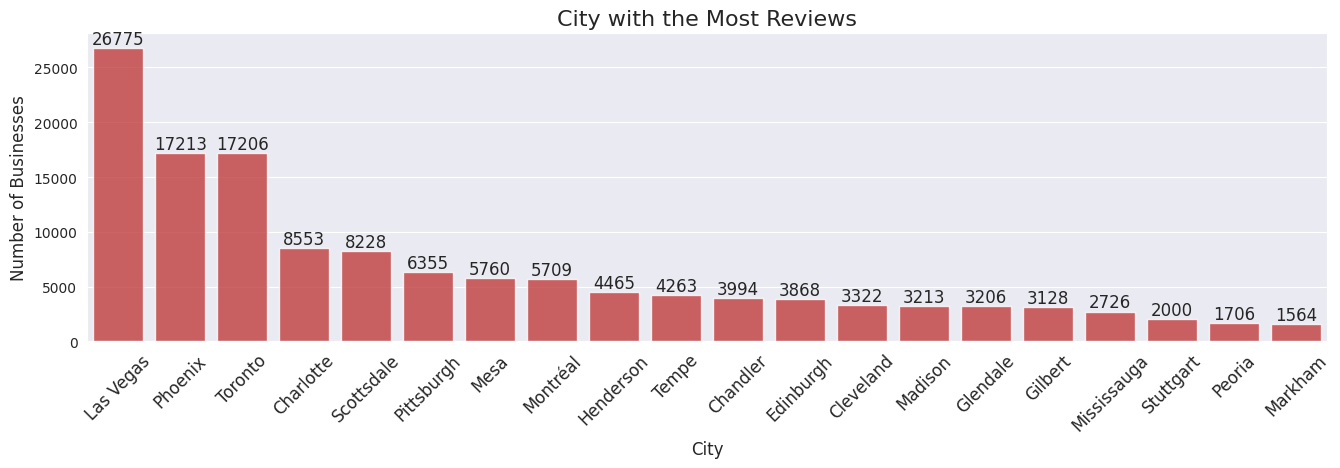

In [ ]:
# Get the number of ratings by city
x = business['city'].value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:20]

# Plot the bar chart
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8, color=color[3])  # Set the bar color to color[3]
plt.title("City with the Most Reviews", fontsize=16)  # Set the title and font size
plt.xticks(rotation=45, fontsize=12)  # Set the rotation angle and font size for x-axis labels
plt.ylabel('Number of Businesses', fontsize=12)  # Set the y-axis label and font size
plt.xlabel('City', fontsize=12)  # Set the x-axis label and font size

rects = ax.patches  # Get the rectangle objects for the bars
labels = x.values  # Get the numeric labels for the bars

# Add numeric labels above each bar
for rect, label in zip(rects, labels):
    height = rect.get_height()  # Get the height of each bar
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=12)  # Add numeric labels, set position, alignment, and font size

plt.show()  # Display the bar chart

In [ ]:
# Get all rating data
rating_data = business[['latitude', 'longitude', 'stars', 'review_count']]

# Create a custom column 'popularity', calculated as the star rating multiplied by the number of reviews
rating_data['popularity'] = rating_data['stars'] * rating_data['review_count']

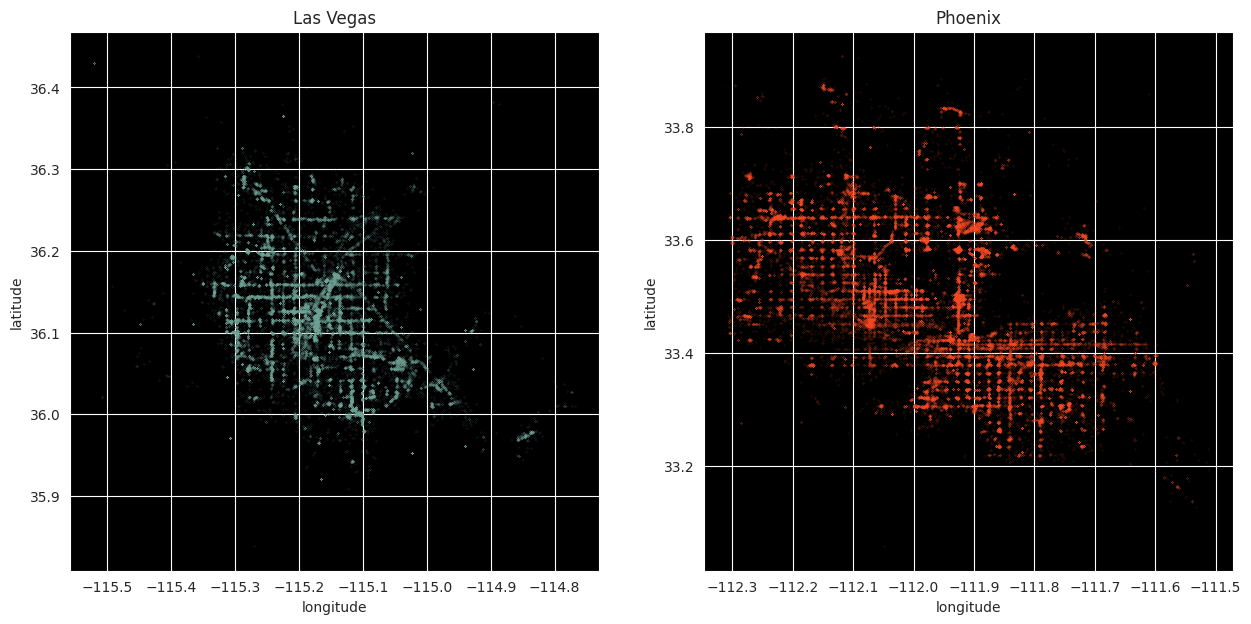

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))  # Create a figure with two subplots, set the size to 15x7

# Las Vegas coordinates
lat = 36.207430
lon = -115.268460
# Adjust coordinates to get an appropriate map view
lon_min, lon_max = lon - 0.3, lon + 0.5
lat_min, lat_max = lat - 0.4, lat + 0.5
# Filter data for Las Vegas based on latitude and longitude range
ratings_data_vegas = rating_data[(rating_data["longitude"] > lon_min) &
                                (rating_data["longitude"] < lon_max) &
                                (rating_data["latitude"] > lat_min) &
                                (rating_data["latitude"] < lat_max)]

# Plot scatter plot for Las Vegas
ratings_data_vegas.plot(kind='scatter', x='longitude', y='latitude',
                       color='#74a89b',
                       s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Las Vegas")  # Set the title for the first subplot
ax1.set_facecolor('black')  # Set the background color of the first subplot to black

# Phoenix coordinates
lat = 33.435463
lon = -112.006989
# Adjust coordinates to get an appropriate map view
lon_min, lon_max = lon - 0.3, lon + 0.5
lat_min, lat_max = lat - 0.4, lat + 0.5
# Filter data for Phoenix based on latitude and longitude range
ratings_data_phoenix = rating_data[(rating_data["longitude"] > lon_min) &
                                  (rating_data["longitude"] < lon_max) &
                                  (rating_data["latitude"] > lat_min) &
                                  (rating_data["latitude"] < lat_max)]
# Plot scatter plot for Phoenix
ratings_data_phoenix.plot(kind='scatter', x='longitude', y='latitude',
                         color='#fb4e29',
                         s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Phoenix")  # Set the title for the second subplot
ax2.set_facecolor('black')  # Set the background color of the second subplot to black

f.show()  # Display the figure

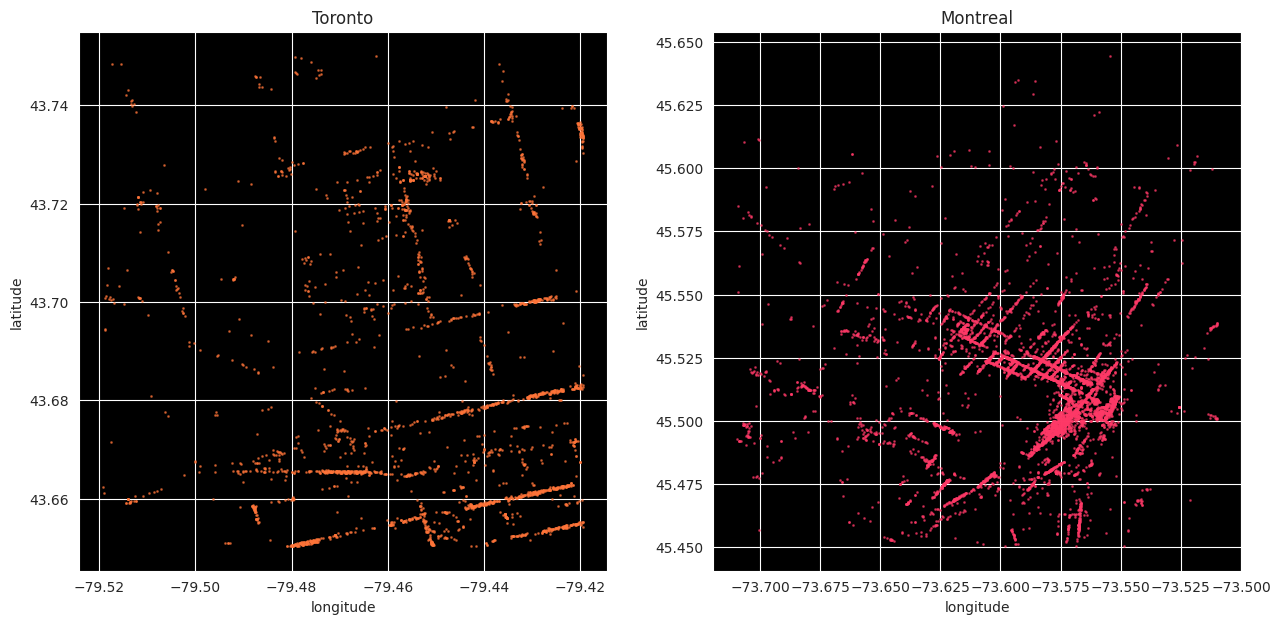

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))  # Create a figure with two subplots, set the size to 15x7

# Toronto coordinates
lat = 43.700344
lon = -79.469283

lon_min, lon_max = lon - 0.05, lon + 0.05
lat_min, lat_max = lat - 0.05, lat + 0.05

# Filter data for Toronto
ratings_data_toronto = rating_data[(rating_data["longitude"] > lon_min) &
                                   (rating_data["longitude"] < lon_max) &
                                   (rating_data["latitude"] > lat_min) &
                                   (rating_data["latitude"] < lat_max)]

# Plot scatter plot for Toronto
ratings_data_toronto.plot(kind='scatter', x='longitude', y='latitude',
                          color='#fe7439',
                          s=1, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Toronto")  # Set the subplot title
ax1.set_facecolor('black')  # Set the background color of the subplot to black

# Montreal coordinates
lat = 45.549958
lon = -73.609630

# Adjust coordinates for a suitable map view
lon_min, lon_max = lon - 0.10, lon + 0.10
lat_min, lat_max = lat - 0.10, lat + 0.10

# Filter data for Montreal
ratings_data_montreal = rating_data[(rating_data["longitude"] > lon_min) &
                                    (rating_data["longitude"] < lon_max) &
                                    (rating_data["latitude"] > lat_min) &
                                    (rating_data["latitude"] < lat_max)]

# Plot scatter plot for Montreal
ratings_data_montreal.plot(kind='scatter', x='longitude', y='latitude',
                           color='#fe3967',
                           s=1, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Montreal")  # Set the subplot title
ax2.set_facecolor('black')  # Set the background color of the subplot to black

# Display the figure
f.show()

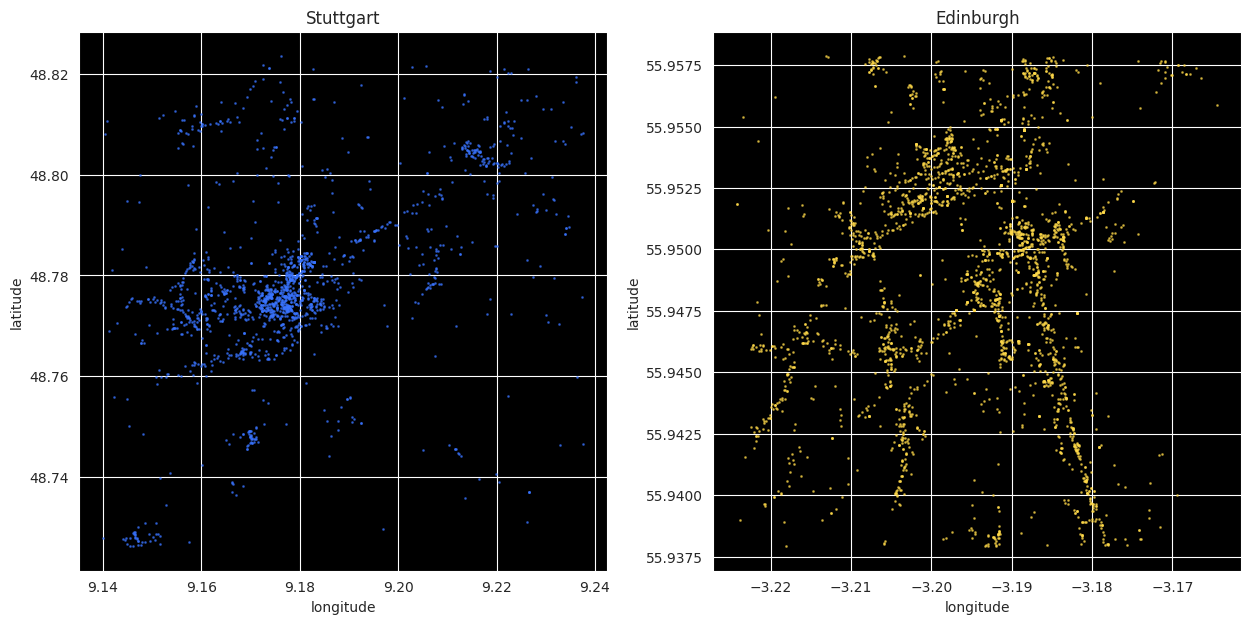

In [ ]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt

# Create a figure with two subplots, size set to 15x7
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

# Select a random point in Stuttgart
lat = 48.7757200
lon = 9.187950
# Adjust coordinates for a suitable map view
lon_min, lon_max = lon - 0.05, lon + 0.05
lat_min, lat_max = lat - 0.05, lat + 0.05
# Filter data for Stuttgart
ratings_data_stuttgart = rating_data[(rating_data["longitude"] > lon_min) &
                                     (rating_data["longitude"] < lon_max) &
                                     (rating_data["latitude"] > lat_min) &
                                     (rating_data["latitude"] < lat_max)]

# Plot scatter plot for Stuttgart
ratings_data_stuttgart.plot(kind='scatter', x='longitude', y='latitude',
                            color='#3973fe',
                            s=1, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Stuttgart")  # Set the subplot title
ax1.set_facecolor('black')  # Set the background color of the subplot to black

# Select a random point in Edinburgh
lat = 55.947871
lon = -3.194255
# Adjust coordinates for a suitable map view
lon_min, lon_max = lon - 0.03, lon + 0.03
lat_min, lat_max = lat - 0.01, lat + 0.01
# Filter data for Edinburgh
ratings_data_edinburgh = rating_data[(rating_data["longitude"] > lon_min) &
                                     (rating_data["longitude"] < lon_max) &
                                     (rating_data["latitude"] > lat_min) &
                                     (rating_data["latitude"] < lat_max)]

# Plot scatter plot for Edinburgh
ratings_data_edinburgh.plot(kind='scatter', x='longitude', y='latitude',
                            color='#ffd949',
                            s=1, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Edinburgh")  # Set the subplot title
ax2.set_facecolor('black')  # Set the background color of the subplot to black

# Display the figure
f.show()

An interesting observation is that cities in the United States often have well-structured grid layouts, while other cities may have more fluid and irregular designs. By visualizing the locations of businesses on a map, we can gain deeper insights into the economic activity distribution and business clusters in different urban areas. This method provides a clear and engaging way to reveal spatial patterns and trends within city regions, which is valuable for urban planning, policy-making, and business decision-making. Through data visualization, we can explore and understand complex spatial relationships within city regions visually, leading to a better understanding of urban development and change.

### Ratings in Las Vegas

Let's take a look at how people rate `different businesses in Vegas`.

Below is an `interactive animation` where we use the amazing Folium package to create stunning Leaflet map visualizations.

Here, in this animation, we highlight businesses based on star ratings.

The goal is to see if there are certain hotspots/clusters with great restaurants.

It turns out that **good and bad businesses are fairly evenly distributed throughout the city.**

`Folium` is a Python library used for creating interactive maps, based on the Leaflet JavaScript library. `folium` provides a simple interface to add markers, heatmaps, polygons, circles, and various other map elements. It also supports displaying data and adding pop-up windows on the map.

Here is an example code demonstrating how to create a simple map using `folium`:

```python
import folium

# Create a map object
m = folium.Map(location=[36.127430, -115.138460], zoom_start=11)  # Specify the initial center coordinates and zoom level

# Add a marker on the map
folium.Marker(location=[36.127430, -115.138460], popup='Las Vegas').add_to(m)  # Add a marker with a pop-up window content

# Display the map
m
```

In [ ]:
data=[]
# Rearrange data to fit the format required by folium
stars_list = list(rating_data['stars'].unique())  # Get a list of unique star ratings
for star in stars_list:  # Iterate through the list of star ratings
    subset = ratings_data_vegas[ratings_data_vegas['stars'] == star]  # Filter the data subset based on star ratings
    data.append(subset[['latitude', 'longitude']].values.tolist())  # Convert latitude and longitude data to a list and add it to the data list

# Set the center coordinates and zoom level for the map
lat = 36.127430
lon = -115.138460
zoom_start = 11
print("Vegas Review Heatmap Animation")  # Print the title

# Create a basic folium map
m = folium.Map(location=[lat, lon], tiles="OpenStreetMap", zoom_start=zoom_start)

# Use the HeatMapWithTime plugin to create a heatmap with dynamic time changes
hm = plugins.HeatMapWithTime(data, max_opacity=0.3, auto_play=True, display_index=True, radius=7)
hm.add_to(m)  # Add the heatmap to the map
m  # Display the map


Vegas Review Heatmap Animation


In [ ]:
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 149.78441977500916 s


## Review Mining

Let's take a look at the top users ranked by the number of reviews they have given.


In [ ]:
# The dataset is too large, with over a million users, so we'll sample 100,000 records. You can use the full dataset if needed.
# The agg() function is used here to perform aggregation on the 'reviews' dataset using a dictionary, where we apply specific aggregation functions like count, sum, etc., on selected fields.
user_agg = reviews.sample(100000).groupby('user_id').agg(
            {'review_id': ['count'],          # Count the number of reviews per user
             'date': ['min', 'max'],          # Get the earliest and latest review dates for each user
             'useful': ['sum'],               # Sum the 'useful' votes for each user
             'funny': ['sum'],                # Sum the 'funny' votes for each user
             'cool': ['sum'],                 # Sum the 'cool' votes for each user
             'stars': ['mean']})              # Calculate the average star rating per user

This code uses the Pandas library to group and aggregate a DataFrame named `reviews` by the 'user_id' column and calculates results for multiple aggregation functions.

Specifically, the `groupby` method is used to group the `reviews` DataFrame by the 'user_id' column. Then, the `agg` method is applied to each group with several aggregation functions including 'count', 'min', 'max', 'sum', and 'mean' to compute the following metrics:

- 'review_id': 'count', calculates the number of reviews for each user;
- 'date': 'min' and 'max', calculate the minimum and maximum review dates for each user;
- 'useful': 'sum', calculates the total of the 'useful' column for each user’s reviews;
- 'funny': 'sum', calculates the total of the 'funny' column for each user’s reviews;
- 'cool': 'sum', calculates the total of the 'cool' column for each user’s reviews;
- 'stars': 'mean', calculates the average value of the 'stars' column for each user’s reviews.

The aggregated results are stored in a new DataFrame named `user_agg`, which contains the computed values for each aggregation function. This allows for summarizing and analyzing each user’s review data, facilitating further data analysis and visualization.

In [ ]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Users in Yelp")
user_agg.head(10)

          Top 10 Users in Yelp


review_id        date             useful funny cool  \
                           count         min         max    sum   sum  sum   
user_id                                                                      
CxDOIDnH8gp9KXzpBHJYXw        76  2009-11-09  2017-08-31    220    86  120   
bLbSNkLggFnqwNNzzq-Ijw        36  2014-01-09  2017-12-02    339   194  235   
PKEzKWv_FktMm2mGPjwd0Q        35  2010-06-19  2017-10-07    328   148  235   
DK57YibC5ShBmqQl97CKog        32  2010-11-29  2017-10-15    308   167  263   
WeVkkF5L39888IPPlRhNpg        26  2012-06-18  2017-08-24    193   112  100   
YMgZqBUAddmFErxLtCfK_w        26  2010-11-23  2016-10-14     96    44   58   
UYcmGbelzRa0Q6JqzLoguw        24  2011-08-14  2016-12-22    160    84  131   
3nDUQBjKyVor5wV0reJChg        24  2010-05-19  2016-10-03    232   122  172   
dIIKEfOgo0KqUfGQvGikPg        23  2007-11-07  2016-06-27    255   107  196   
cMEtAiW60I5wE_vLfTxoJQ        21  2010-03-31  2016-04-24     28     9   19   

                           stars  
                            mean  
user_id                           
CxDOIDnH8gp9KXzpBHJYXw  3.092105  
bLbSNkLggFnqwNNzzq-Ijw  3.055556  
PKEzKWv_FktMm2mGPjwd0Q  3.714286  
DK57YibC5ShBmqQl97CKog  3.781250  
WeVkkF5L39888IPPlRhNpg  3.923077  
YMgZqBUAddmFErxLtCfK_w  3.653846  
UYcmGbelzRa0Q6JqzLoguw  3.041667  
3nDUQBjKyVor5wV0reJChg  3.916667  
dIIKEfOgo0KqUfGQvGikPg  3.695652  
cMEtAiW60I5wE_vLfTxoJQ  4.000000

The reviews might be randomly sampled from all reviews.

### Tracking High-Value Users

Let's track the top-ranked users from the review dataset.

To do this, we create a map showing all the locations they have visited in chronological order and then generate a heatmap animation from it.

In [ ]:
# Track the top user:
top_user_reviews = reviews[reviews['user_id'] == 'CxDOIDnH8gp9KXzpBHJYXw']
# Get the location information of the top user's reviews
top_user_locs = pd.merge(top_user_reviews, business, on='business_id')
# Get a list of unique dates from the top user's reviews
date_list = list(top_user_locs['date'].unique())
# Reorganize the data to fit the format required by the Folium library
data = []
for date in date_list:
    subset = top_user_locs[top_user_locs['date'] == date]
    df = subset[['latitude', 'longitude', 'date']]
    data.append(subset[['latitude', 'longitude']].values.tolist())

In [ ]:
# Initialize the map, setting the initial location to Ontario, Canada with latitude 43.860397 and longitude -79.303184, and a starting zoom level of 9
lat = 43.860397
lon = -79.303184
zoom_start = 9
print("                     Stalking the top User    ")

# Create the base map object using the Cartodb Positron tile style, with the specified initial location and zoom level
m = folium.Map(location=[lat, lon], tiles="Cartodb Positron", zoom_start=zoom_start)

# Create a heatmap object with a time slider, passing in the data and additional parameters
hm = plugins.HeatMapWithTime(data, max_opacity=0.3, auto_play=True, display_index=True)
hm.add_to(m)  # Add the heatmap object to the map
m  # Display the map

                     Stalking the top User    


"Highest Rating with Increasing Useful":

This regression plot shows the trend of the highest ratings (stars) as the number of useful votes in reviews increases.

The x-axis represents the thresholds for useful votes, ranging from 100 to 1000, with intervals of 20;

The y-axis represents the highest rating value corresponding to each threshold. The chart helps us understand the relationship between the number of useful votes and the highest rating.

In [ ]:
# This is how we can filter out the useless data and keep users who have posted all three words before
# We can also do this using query()
reviews[(reviews['useful']>0) & (reviews['funny']>0) & (reviews['cool']>0)]

review_id                 user_id  \
13       lsoSqIrrDbQvWpMvsSj2xw  u0LXt3Uea_GidxRW1xcsfg   
19       WYDFJOBOl7cycd7gN-c_xA  u0LXt3Uea_GidxRW1xcsfg   
25       Ia-w-nR1FrlzsiuEiqqlbg  u0LXt3Uea_GidxRW1xcsfg   
27       _ku1sDwkmQo2wIgWAaluZw  u0LXt3Uea_GidxRW1xcsfg   
44       Q0j8DFqW_zWNa-H1QuuPgg  u0LXt3Uea_GidxRW1xcsfg   
...                         ...                     ...   
5261637  _HubomG7kARyUVuemJbZbQ  vPCYOCTMTixFXn1_60UjJQ   
5261639  K1fnP4pi9qXl2pw6G4gITQ  CPIGdVV2ByLA_nqP1F4S-Q   
5261645  CIMhrYaTrldYxWqYlYPN-A  mPjPyipaD0C_myqWqDipZg   
5261661  ZU2UF0YBkhQFctXH5Mry3A  mPjPyipaD0C_myqWqDipZg   
5261663  PoGSiNz1X5SUu0qEt-qM5w  mPjPyipaD0C_myqWqDipZg   

                    business_id  stars        date  \
13       RtUvSWO_UZ8V3Wpj0n077w      3  2012-12-03   
19       zgQHtqX0gqMw1nlBZl2VnQ      1  2012-10-30   
25       Eox_Qq74oaFZ-YjthpHhBw      3  2011-07-18   
27       tOhRQqiupLyJdBJVQMGOEQ      5  2012-09-23   
44       TrOgTZ0DfmQxvpTehiNibQ      1  2011-05-10   
...                         ...    ...         ...   
5261637  LBAkHJJfCoDj9aa5sc0Mxw      1  2013-12-13   
5261639  UicG-oyX4bjmcQbmXn7hGw      5  2012-12-29   
5261645  6y-z_jGX7PCUubMPFDbxVA      4  2011-10-18   
5261661  CMkayuNDHPcd1dxO32kJyA      1  2012-05-24   
5261663  Ngk84Ax1tXgpoJFEGxot3w      1  2011-11-21   

                                                      text  useful  funny  \
13       Wanted to check out this place due to all the ...       2      1   
19       really excited to hear of this restaurant comi...       9      2   
25       Service is really slow here. I waited for over...       1      1   
27       OMG - Definitely worth going if you are in Mon...       1      1   
44       worse customer service ever. \nManager on duty...      11      5   
...                                                    ...     ...    ...   
5261637  For anyone that is actually from Illinois to d...       2      1   
5261639  I go there with my friends in a group to race ...       1      1   
5261645  Went there on a tuesday nite in a group of 13 ...       1      2   
5261661  This place is retarded!!!  Called on a thursda...       4      4   
5261663  Bought groupon $39 for 4 months from groupon, ...      36      3   

         cool  
13          1  
19          1  
25          1  
27          1  
44          5  
...       ...  
5261637     1  
5261639     1  
5261645     2  
5261661     1  
5261663     3  

[714832 rows x 9 columns]

[5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2.4, 2.2, 2.0, 1.9, 1.9, 1.8, 1.4, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.2, 1.2, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.2, 1.3]
[1513.920424403183, 1471.5143884892086, 1463.611111111111, 1380.0314136125655, 1320.5974842767296, 1324.9774436090227, 1331.38, 1316.9450549450548, 1344.75, 1419.888888888889, 1406.4285714285713, 1433.2142857142858, 1472.5740740740741, 1456.5, 1456.5, 1457.4791666666667, 1419.5454545454545, 1419.5454545454545, 1422.0, 1445.425, 1456.2631578947369, 1460.6857142857143, 1494.3870967741937, 1494.3870967741937, 1494.3870967741937, 1503.7666666666667, 1529.4137931034484, 1606.037037037037, 1710.2083333333333, 1761.2173913043478, 1872.0, 1872.0, 1872.0, 1872.0, 1958.3684210526317, 1889.9375, 1889.9375, 1889.9375, 1889.9375, 1983.4, 2043.

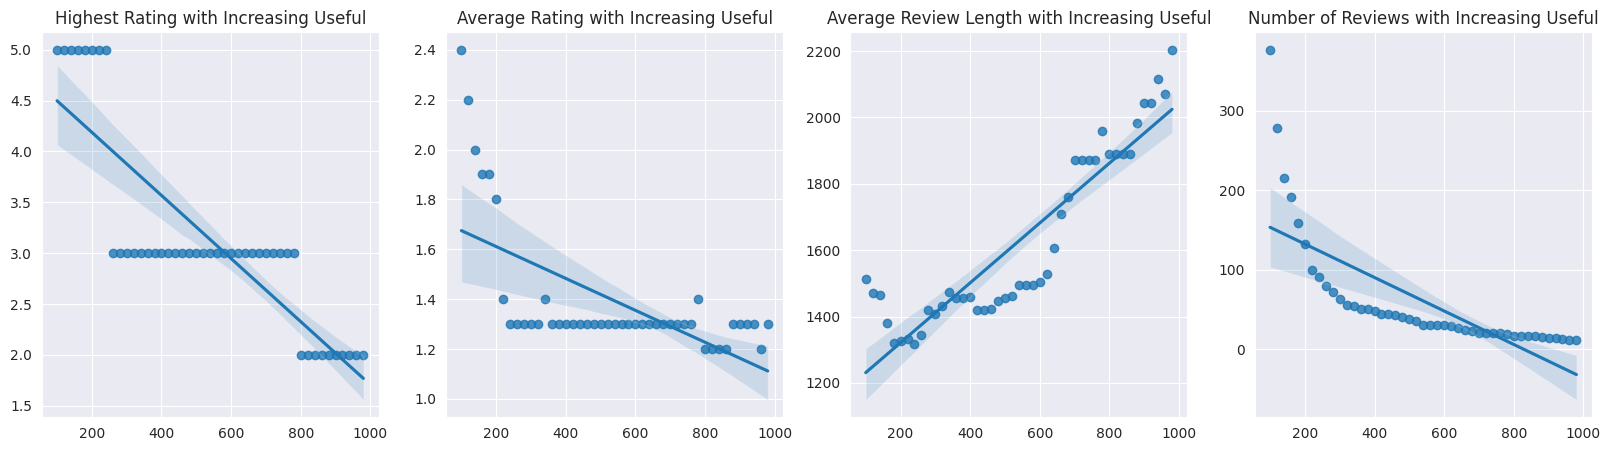

In [ ]:
reviews = reviews.query('useful > 0 and funny > 0 and cool > 0')

# Setting thresholds from 100 to 1000 with a step of 20
thresholds = [x for x in range(100, 1000, 20)]
# For each threshold, find the maximum star rating, average star rating, average review length, and number of reviews for users with useful votes greater than the threshold
max_star = [round(reviews.query('useful > @thres').stars.max(), 1) for thres in thresholds]
avg_star = [round(reviews.query('useful > @thres').stars.mean(), 1) for thres in thresholds]
avg_review_len = [reviews.query('useful > @thres')['text'].agg(lambda x: len(x)).agg('mean') for thres in thresholds]
n_review = [reviews.query('useful > @thres').stars.count() for thres in thresholds]

print(max_star)
print(avg_star)
print(avg_review_len)
print(n_review)

# Now we can plot the results, as we're looking at how various metrics change across different thresholds
fig, axes = plt.subplots(1, 4, figsize=[20, 5])

sns.regplot(x=thresholds, y=max_star, ax=axes[0])
axes[0].title.set_text('Highest Rating with Increasing Useful')

sns.regplot(x=thresholds, y=avg_star, ax=axes[1])
axes[1].title.set_text('Average Rating with Increasing Useful')

sns.regplot(x=thresholds, y=avg_review_len, ax=axes[2])
axes[2].title.set_text('Average Review Length with Increasing Useful')

sns.regplot(x=thresholds, y=n_review, ax=axes[3])
axes[3].title.set_text('Number of Reviews with Increasing Useful')

plt.show()

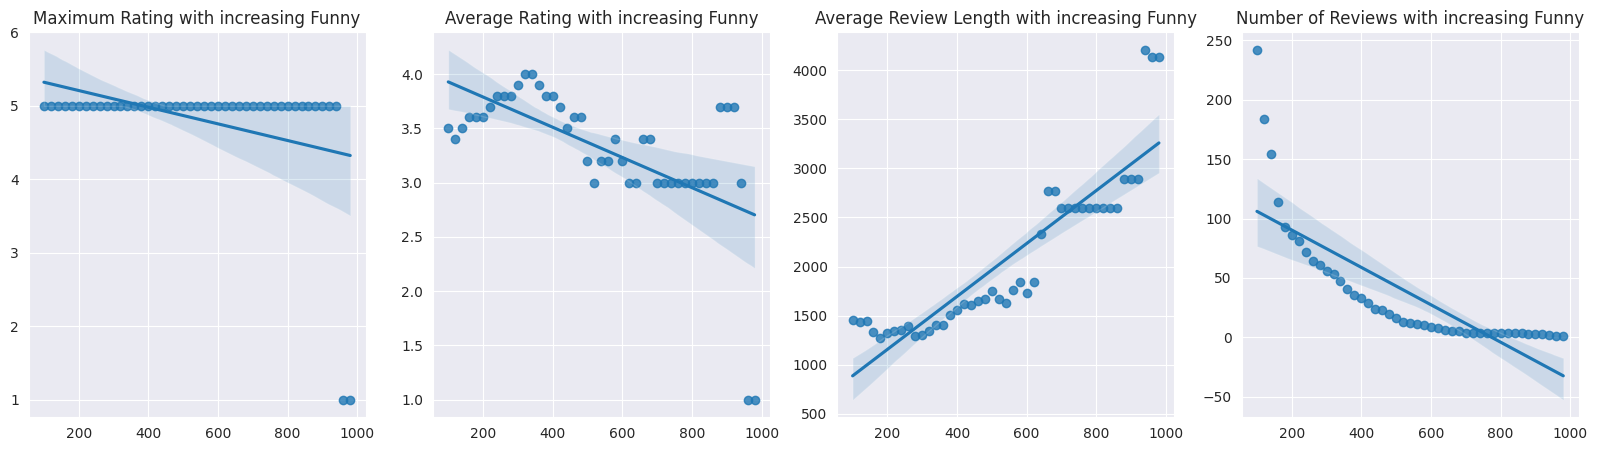

In [ ]:
thresholds = [x for x in range(100,1000,20)]
max_star = [round(reviews.query('funny>@thres').stars.max(),1) for thres in thresholds]
avg_star = [round(reviews.query('funny>@thres').stars.mean(),1) for thres in thresholds]
avg_review_len = [reviews.query('funny>@thres')['text'].agg(lambda x: len(x)).agg('mean') for thres in thresholds]
n_review = [reviews.query('funny>@thres').stars.count() for thres in thresholds]

fig, axes = plt.subplots(1, 4, figsize = [20,5])
sns.regplot(x=thresholds, y=max_star,ax = axes[0])
axes[0].title.set_text('Maximum Rating with increasing Funny')

sns.regplot(x=thresholds, y=avg_star,ax = axes[1])
axes[1].title.set_text('Average Rating with increasing Funny')

sns.regplot(x=thresholds, y=avg_review_len,ax = axes[2])
axes[2].title.set_text('Average Review Length with increasing Funny')

sns.regplot(x=thresholds, y=n_review,ax = axes[3])
axes[3].title.set_text('Number of Reviews with increasing Funny')

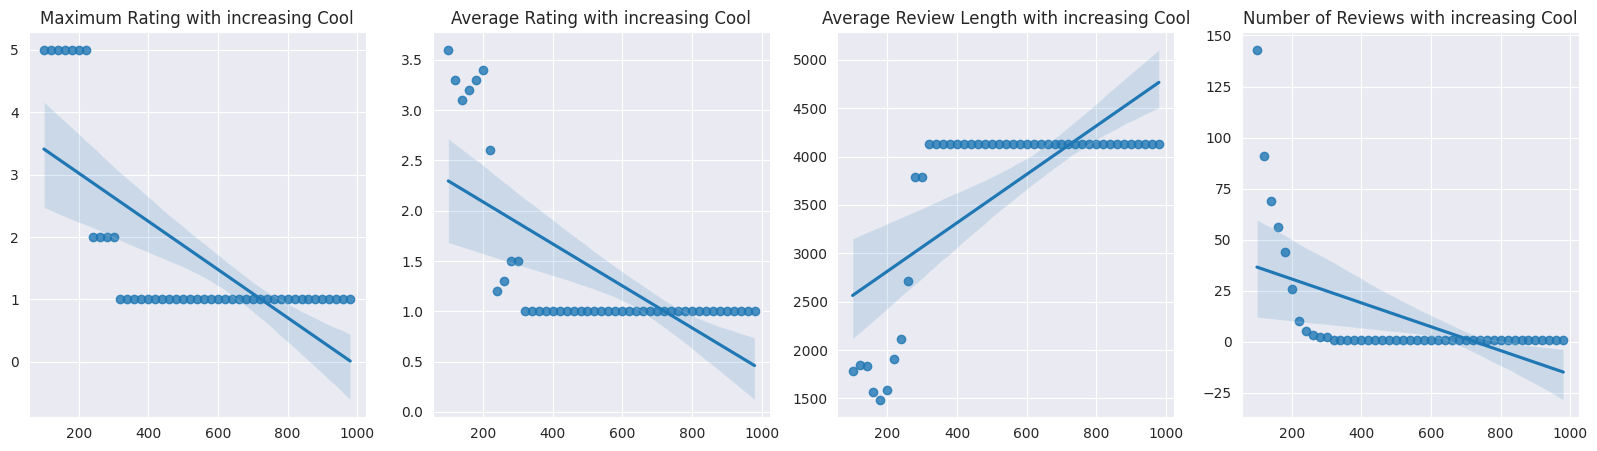

In [ ]:
thresholds = [x for x in range(100, 1000, 20)]
max_star = [round(reviews.query('cool > @thres').stars.max(), 1) for thres in thresholds]
avg_star = [round(reviews.query('cool > @thres').stars.mean(), 1) for thres in thresholds]
avg_review_len = [reviews.query('cool > @thres')['text'].agg(lambda x: len(x)).agg('mean') for thres in thresholds]
n_review = [reviews.query('cool > @thres').stars.count() for thres in thresholds]

fig, axes = plt.subplots(1, 4, figsize = [20,5])
sns.regplot(x=thresholds, y=max_star,ax = axes[0])
axes[0].title.set_text('Maximum Rating with increasing Cool')

sns.regplot(x=thresholds, y=avg_star,ax = axes[1])
axes[1].title.set_text('Average Rating with increasing Cool')

sns.regplot(x=thresholds, y=avg_review_len,ax = axes[2])
axes[2].title.set_text('Average Review Length with increasing Cool')

sns.regplot(x=thresholds, y=n_review,ax = axes[3])
axes[3].title.set_text('Number of Reviews with increasing Cool')

### 情感分析

In [ ]:
from textblob import TextBlob

以下是一个简单的 TextBlob 实现示例，演示了如何使用 TextBlob 进行基本的文本处理和情感分析：

```python
from textblob import TextBlob

# 创建 TextBlob 对象
text = "I love this product! It's amazing."
blob = TextBlob(text)

# 分词
words = blob.words
print("分词结果：", words)

# 词性标注
tags = blob.tags
print("词性标注结果：", tags)

# 名词短语提取
noun_phrases = blob.noun_phrases
print("名词短语提取结果：", noun_phrases)

# 情感分析
sentiment = blob.sentiment
polarity = sentiment.polarity
subjectivity = sentiment.subjectivity
print("情感分析结果：")
print("极性（-1 到 1 之间，负面到正面）：", polarity)
print("主观性（0 到 1 之间，客观到主观）：", subjectivity)
```

这段代码首先导入了 TextBlob 库，并创建了一个 TextBlob 对象 blob，表示待处理的文本。然后，通过调用 TextBlob 对象的方法，如 words、tags、noun_phrases 和 sentiment，进行文本处理和情感分析。

在这个示例中，输入文本是 "I love this product! It's amazing."，TextBlob 对象 blob 分别执行了分词、词性标注、名词短语提取和情感分析这几个任务，并输出了相应的结果。

In [ ]:
reviews.merge(user[user['elite'] != 'None']['user_id']).head(10)

review_id                 user_id             business_id  \
0  lsoSqIrrDbQvWpMvsSj2xw  u0LXt3Uea_GidxRW1xcsfg  RtUvSWO_UZ8V3Wpj0n077w   
1  WYDFJOBOl7cycd7gN-c_xA  u0LXt3Uea_GidxRW1xcsfg  zgQHtqX0gqMw1nlBZl2VnQ   
2  Ia-w-nR1FrlzsiuEiqqlbg  u0LXt3Uea_GidxRW1xcsfg  Eox_Qq74oaFZ-YjthpHhBw   
3  _ku1sDwkmQo2wIgWAaluZw  u0LXt3Uea_GidxRW1xcsfg  tOhRQqiupLyJdBJVQMGOEQ   
4  Q0j8DFqW_zWNa-H1QuuPgg  u0LXt3Uea_GidxRW1xcsfg  TrOgTZ0DfmQxvpTehiNibQ   
5  cKeZ1e-HRBodUpnz1j8BJA  u0LXt3Uea_GidxRW1xcsfg  dw2ST-AHUbu2xq0QNfngBA   
6  1oPgWJHJiKZShjdJxZHylA  u0LXt3Uea_GidxRW1xcsfg  JnKzrXKxY1cThJ0vNk-4pA   
7  O4v-1NYH4-t92X-zXBWynw  nOTl4aPC4tKHK35T3bNauQ  5-Gs-cUI_8-3Ykl9KbCLsw   
8  V6z_U8AA-35-pp7GMPRDBw  nOTl4aPC4tKHK35T3bNauQ  OwYElCdiJ1IGKVJ4--_mvQ   
9  PRj0OFgJjN5ljpeDskP_Tw  nOTl4aPC4tKHK35T3bNauQ  6Q7-wkCPc1KF75jZLOTcMw   

   stars        date                                               text  \
0      3  2012-12-03  Wanted to check out this place due to all the ...   
1      1  2012-10-30  really excited to hear of this restaurant comi...   
2      3  2011-07-18  Service is really slow here. I waited for over...   
3      5  2012-09-23  OMG - Definitely worth going if you are in Mon...   
4      1  2011-05-10  worse customer service ever. \nManager on duty...   
5      5  2010-09-15  This place is really good! The best restaurant...   
6      2  2012-05-11  You can see that people only eat here to use t...   
7      4  2011-05-06  I started going to this nail salon last summer...   
8      1  2012-12-04  This whole place basically sucks and it's even...   
9      2  2012-08-22  Okay, so from what I am reading, a lot of othe...   

   useful  funny  cool  
0       2      1     1  
1       9      2     1  
2       1      1     1  
3       1      1     1  
4      11      5     5  
5       3      1     1  
6       3      2     1  
7      15      1     5  
8      11     10     3  
9       3      1     1

In [ ]:
reviews.merge(user[user['elite'] != 'None']['user_id']).query("date.str.startswith('2012')", engine='python')['text'].head(10)

0     Wanted to check out this place due to all the ...
1     really excited to hear of this restaurant comi...
3     OMG - Definitely worth going if you are in Mon...
6     You can see that people only eat here to use t...
8     This whole place basically sucks and it's even...
9     Okay, so from what I am reading, a lot of othe...
13    I am just perplexed by the good reviews of thi...
16    When I worked in the area, we would treat ours...
17    I have driven past this bakery so many times a...
18    So I've given myself a rule that I'm going to ...
Name: text, dtype: object

In [ ]:
%%time
elite_review_sentiment_score_2012 = reviews.merge(user[user['elite'] != 'None']['user_id'])\
.query("date.str.startswith('2012')", engine='python')['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

regular_review_sentiment_score_2012 = reviews.merge(user[user['elite'] == 'None']['user_id'])\
.query("date.str.startswith('2012')", engine='python')['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

CPU times: user 1min 14s, sys: 152 ms, total: 1min 14s
Wall time: 1min 14s


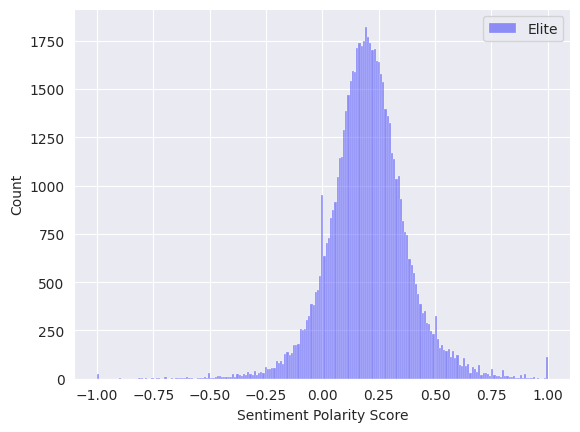

In [ ]:
ax3 = sns.histplot(elite_review_sentiment_score_2012, color='blue', alpha=0.4, label='Elite')
ax4 = sns.histplot(regular_review_sentiment_score_2012, color='orange', alpha=0.4, label='Regular')

# Adding labels and a legend
plt.xlabel('Sentiment Polarity Score')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()

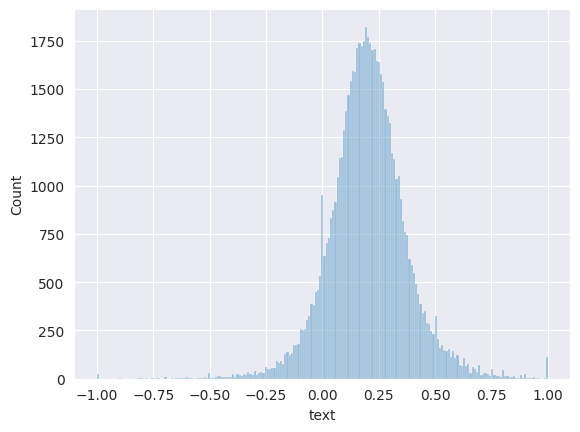

In [ ]:
import seaborn as sns

ax1 = sns.histplot(elite_review_sentiment_score_2012, alpha = .4)
ax2 = sns.histplot(regular_review_sentiment_score_2012, alpha = .4)

In [ ]:
def senti_word_cloud(s,max_words = 200):
    import matplotlib
    from wordcloud import WordCloud
    matplotlib.rcParams['figure.figsize'] = (20,10)
    # color_mask =imageio.imread("1.png")
    wc1 = WordCloud(background_color="black",  # 背景颜色
            max_words=max_words,  # 显示最大词数
            # font_path="msyh.ttf",
            width=1920, height=1080
            ) # 图幅宽度

    wc2 = WordCloud(background_color="white",  # 背景颜色
            max_words=max_words,  # 显示最大词数
            # font_path="msyh.ttf",
            width=1920, height=1080
            ) # 图幅宽度

    positivelist = []
    negativelist = []

    from textblob import TextBlob
    for each in s:
        each_word = TextBlob(each)
        feeling = each_word.sentiment.polarity
        if feeling > 0.75:
            positivelist.append(each)
        elif feeling < -0.65:
            negativelist.append(each)
        else:
            pass
    # 将积极和消极的两个列表各自合并成积极字符串和消极字符串，字符串中的词用空格分隔

    positive_string = " ".join(positivelist)
    negative_string = " ".join(negativelist)


    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    wc1.generate(negative_string)
    axes[0].imshow(wc1, interpolation='bilinear')
    axes[0].set_title('Negative')
    axes[0].axis('off')

    wc2.generate(positive_string)
    axes[1].imshow(wc2, interpolation='bilinear')
    axes[1].set_title('Positive')
    axes[1].axis('off')

    plt.show()

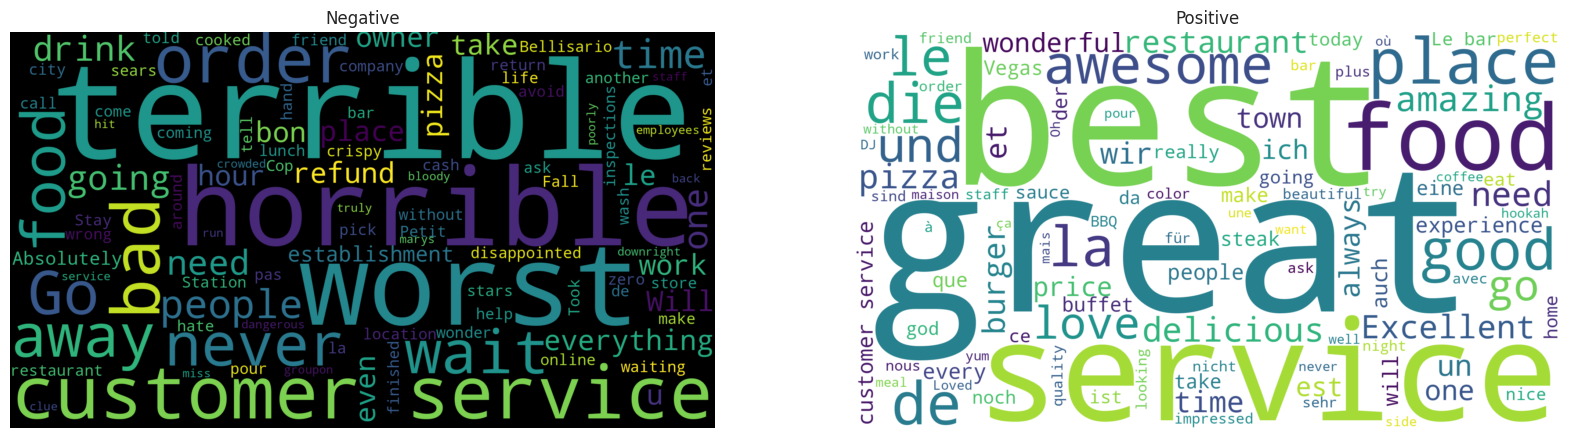

In [ ]:
senti_word_cloud(reviews['text'].sample(20000),max_words = 100)

分别对精英用户和普通用户的评论进性情感分析的极性打分，可以看出总体极性分布，精英用户更加集中在0.25左右，偏正向

然后我们分别看看极性超过0.25或者小于-0.25的关键词分布情况，构建词云

## 5.3 User summary stats:

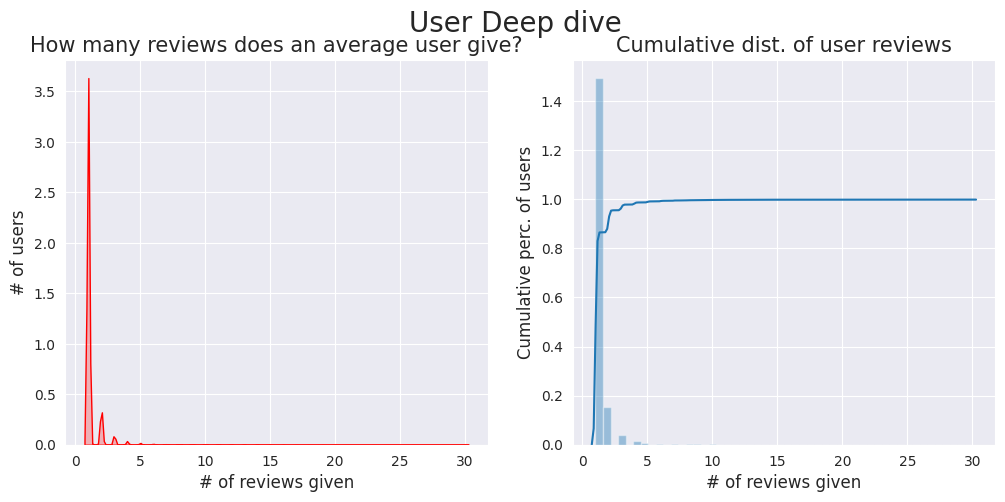

Took 276.48725390434265 s


In [ ]:
# Cap max reviews to 30 for better visuals
user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30
plt.figure(figsize=(12,5))
plt.suptitle("User Deep dive",fontsize=20)
gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))
#Cumulative Distribution
ax=sns.kdeplot(user_agg[('review_id','count')],shade=True,color='r')
plt.title("How many reviews does an average user give?",fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('# of users', fontsize=12)

#Cumulative Distribution
plt.subplot2grid((1,2),(0,1))
sns.distplot(user_agg[('review_id','count')],
             kde_kws=dict(cumulative=True))
plt.title("Cumulative dist. of user reviews",fontsize=15)
plt.ylabel('Cumulative perc. of users', fontsize=12)
plt.xlabel('# of reviews given', fontsize=12)

plt.show()
end_time=time.time()
print("Took",end_time-start_time,"s")

~80% of the users write only about 2 reviews!

这里只用了10000个数据样本

In [ ]:
gc.collect()
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 276.68027210235596 s


## 注册数据


-  `highlight_max`函数

`highlight_max`函数是一个用于在pandas的Series或DataFrame中突出显示最大值的Python函数。

-  参数

    - `data`：pandas的Series或DataFrame，需要突出显示最大值。
    - `color`：可选参数，用于指定用于突出显示最大值的颜色。默认为'yellow'。

- 工作原理

    1. 函数首先创建一个字符串`attr`，其中包含基于`color`参数设置背景颜色的CSS样式。

    2. 然后，它使用`data.ndim`属性检查输入数据的维度。如果维度为1，意味着`data`是一个Series，函数会继续使用`data == data.max()`将Series中的每个值与最大值进行比较。这将创建一个布尔Series `is_max`，其中在值等于最大值的位置处为`True`，其他位置为`False`。

    3. 接下来，函数使用列表推导式为`is_max`中的每个值创建一个CSS样式字符串的列表，其中值为'True'时为'attr'，值为'False'时为''。这个CSS样式字符串的列表作为输出返回。

    4. 如果`data`的维度大于1，说明`data`是一个DataFrame，函数使用`data.max().max()`来获取整个DataFrame中的最大值。然后，它创建一个布尔DataFrame `is_max`，其形状与`data`相同，其中每个元素等于最大值时为`True`，否则为`False`。

    5. 接下来，函数使用`np.where()`创建一个新的DataFrame，其中与`is_max`中的`True`对应的值被设置为'attr'（即CSS样式字符串），与`False`对应的值被设置为空字符串''。生成的DataFrame具有与`data`相同的索引和列，并作为输出返回。


In [ ]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max() # Series of True and False values, where True indicates that the corresponding value in data is the maximum
        return [attr if v else '' for v in is_max] # If v in is_max is true, the result list will contain attr.
        # Eventually, we will output a Series
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [ ]:
def highlight_min(data, color='lightblue'):
    '''
    highlight the minimum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:
      is_min = data == data.min()
      result = [attr if v else '' for v in is_min]
      return result
    else:
      is_min = data == data.min().min()
      result = pd.DataFrame(np.where(is_min, attr, ''),
                          index=data.index, columns=data.columns)
      return result

In [ ]:
#checkins exploration

# 对check_in数据按照'weekday'和'hour'进行分组，计算每组中的'checkins'之和
df = check_in.groupby(['weekday', 'hour'])['checkins'].sum()

# 重置索引，将分组后的结果转换为DataFrame
df = df.reset_index()

# 使用'hour'作为行索引，'weekday'作为列索引，将'checkins'作为值的DataFrame
df = df.pivot(index='hour', columns='weekday')[['checkins']]

# 删除多余的列级别
df.columns = df.columns.droplevel()

# 重置行索引
df = df.reset_index()

# 对'hour'列进行处理，将其转换为整数类型
# 这里使用了lambda函数和split方法将时间字符串中的分钟部分去掉
df.hour = df.hour.apply(lambda x: str(x).split(':')[0])
df.hour = df.hour.astype(int)

# 按照'hour'列的值进行排序
df = df.sort_values('hour')

# 重新排列列的顺序，将'hour'列放在第一列
df = df[['hour', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

# 创建颜色映射
cm = sns.light_palette("orange", as_cmap=True)

# 使用自定义函数highlight_max，将每列中的最大值突出显示，颜色为蓝色
df.style.apply(highlight_max, color='#679bff', axis=0) # df.style object is a Pandas Styler object designed to control the visual presentation of the DataFrame.
df.style.apply(highlight_max, color='#679bff', axis=0).apply(highlight_min, color='#2e8b57', axis=0)

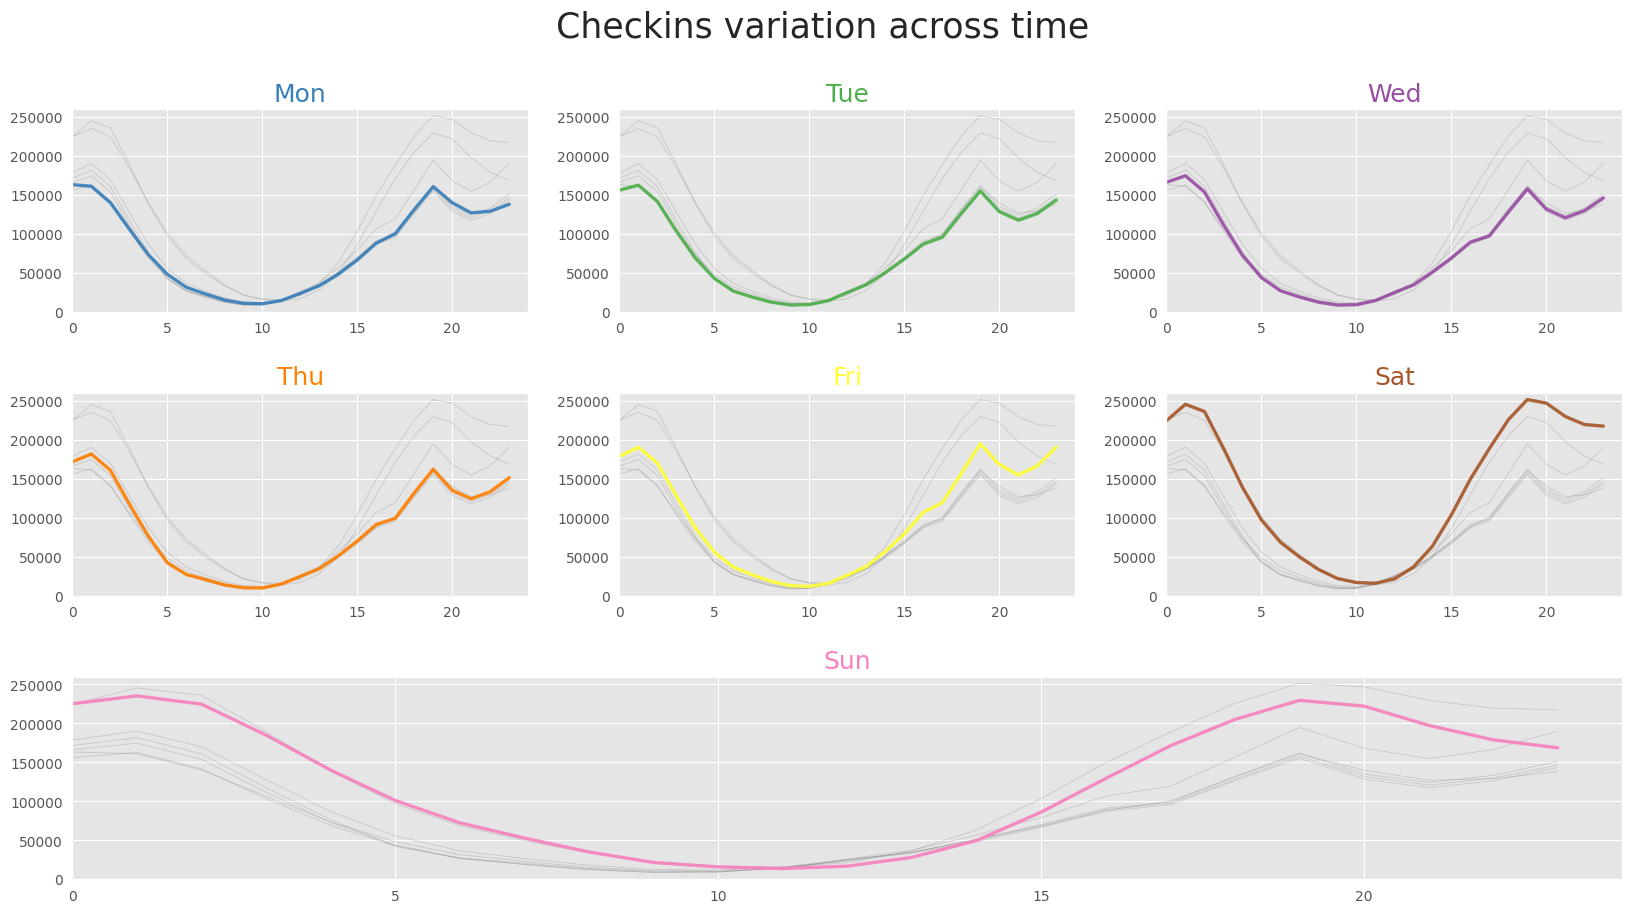

In [ ]:
plt.style.use('ggplot')

# 使用'seaborn-darkgrid'样式设置绘图风格

# 创建颜色调色板
palette = plt.get_cmap('Set1')

# 创建一个大小为(20,10)的图像
plt.figure(figsize=(20,10))

# 添加总标题
plt.suptitle("Checkins variation across time", fontsize=25)

# 创建3x3的网格布局
gridspec.GridSpec(3,3)

# 调整子图之间的垂直间距
plt.subplots_adjust(hspace=0.4)

# 循环绘制多个线图
num = 0
for column in df.drop('hour', axis=1):
    num += 1
    # 找到子图的位置

    if num == 7:  # 调整以适应星期日的位置
        plt.subplot2grid((3,3), (2,0), colspan=3)
    else:
        plt.subplot(3,3, num)

    # 绘制离散的灰色线图，表示所有组的趋势
    for v in df.drop('hour', axis=1):
        plt.plot(df['hour'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)

    # 绘制带有标签的线图，表示特定组的趋势
    plt.plot(df['hour'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)

    # 设置x轴的范围
    plt.xlim(0,24)

    # 设置y轴的范围
    plt.ylim(-2,260000)

    # 关闭部分子图的x轴刻度
    if num in range(4) :
        plt.tick_params(labelbottom='off')

    # 关闭部分子图的y轴刻度
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')

    # 添加子图标题
    plt.title(column, loc='center', fontsize=18, fontweight=0, color=palette(num))

## 用户网络

用户表包含用户及其朋友的列表。让我们试着用这个做一个网络！

### 全局图表

In [ ]:
# 筛选至少有一个朋友的用户子集
subset_users = user[user['friends'] != 'None']

# 筛选至少给出 10 条评论的用户子集
subset_users = subset_users[subset_users['review_count'] >= 10]

# 拆分 "friends" 列的值，并创建新的 "list_friends" 列
subset_users['list_friends'] = subset_users["friends"].apply(lambda x: str(x).split(','))

# 仅选择 "user_id" 和 "list_friends" 两列
subset_users = subset_users[['user_id','list_friends']]

# 由于空间限制，限制 DataFrame 在前 6000 行
subset_users = subset_users.iloc[0:6000]

# 将 "user_id" 列设置为索引，并将 "list_friends" 列的值堆叠成多行
res = subset_users.set_index(['user_id'])['list_friends'].apply(pd.Series).stack()


In [ ]:
network_data=res.reset_index()
network_data.tail()

user_id  level_1                        0
651588  N0ZkwirFkd_kwp05ymeYkQ      114   3MH98JxTJ4DaSy6bPkj-ng
651589  N0ZkwirFkd_kwp05ymeYkQ      115   p3ZDh00RLio8itC5a07lPg
651590  N0ZkwirFkd_kwp05ymeYkQ      116   ZAc5vMMYLgyYqgjHXGce3Q
651591  N0ZkwirFkd_kwp05ymeYkQ      117   25NDlYy0wzjq7mh3IiCp0Q
651592  N0ZkwirFkd_kwp05ymeYkQ      118   lJix8dFRFk4WvVpdRTyC0g

In [ ]:
#changing the column name to suit nx import
network_data.columns=['source','level_1','target']

# Considering each (user_id,friend) pair as an edge of a graph, constructing the graph
graph = nx.from_pandas_edgelist(network_data.sample(1000))
# logging time
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 296.48727464675903 s


1741
1000
The density of the graph is  0.000660209814679105


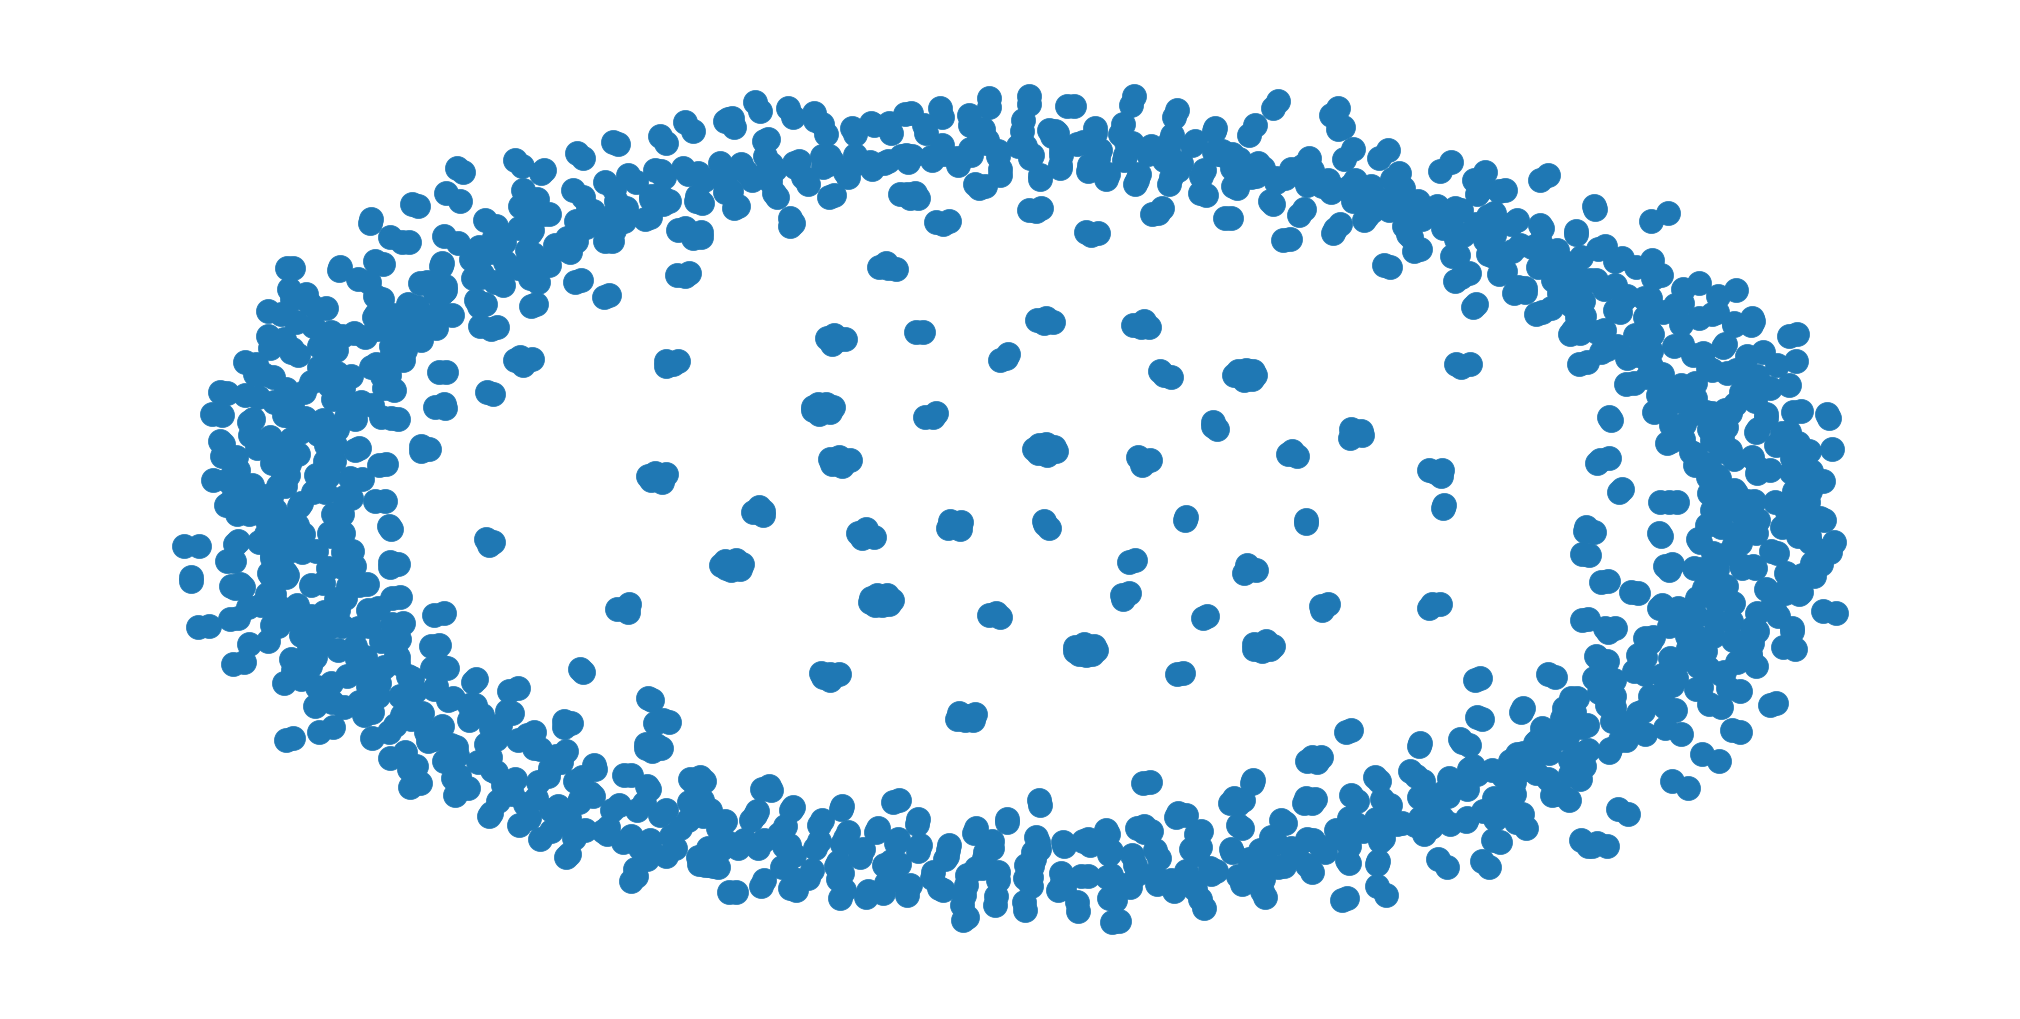

In [ ]:
#credits https://www.kaggle.com/crailtap/basic-network-analysis-tutorial
#basic info
print(graph.number_of_nodes())
print(graph.number_of_edges())
# print(nx.info(graph))
#check density
print("The density of the graph is ",nx.density(graph))
# we get a very sparse(not dense) graph. Maybe if we used all the nodes then we might get a more dense graph
#too big to draw!
nx.draw(graph, pos=nx.spring_layout(graph))

### 图的子集 - 斯图加特地区

In [ ]:
# 从位于 Stuttgart 城市的商家中提取用户数据并创建用户网络图

# 选择位于 Stuttgart 城市的商家
subset = business[business.city == 'Stuttgart']

# 将商家数据与评论数据进行内连接
subset = pd.merge(subset, reviews, how='inner', on='business_id')

# 提取唯一的用户ID
subset_users = subset.user_id.unique()

# 创建用户ID的数据框
subset_users = pd.DataFrame(subset_users, columns=['user_id'])

# 将用户ID与用户数据集进行内连接
subset_users = pd.merge(subset_users, user, how='inner', on='user_id')

# 创建好友列表
subset_users['list_friends'] = subset_users["friends"].apply(lambda x: str(x).split(','))
subset_users['count_friends'] = subset_users["list_friends"].apply(lambda x: len(x))

# 检查结果
subset_users.shape


(282, 24)

In [ ]:
# 提取用户ID和好友列表
subset_users_list = subset_users[['user_id', 'list_friends']]

# 将好友列表展开成多行
network_data = subset_users_list.set_index(['user_id'])['list_friends'].apply(pd.Series).stack()
network_data = network_data.reset_index()

# 修改列名以适应网络图导入
network_data.columns = ['source', 'level_1', 'target']

In [ ]:
graph=nx.from_pandas_edgelist(network_data)
# logging time
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 312.94322872161865 s


In [ ]:
#basic info
print(graph.number_of_nodes())
print(graph.number_of_edges())
# print(nx.info(graph))
#check density
print("The density of the graph is ",nx.density(graph))

31979
43839
The density of the graph is  8.573821892400615e-05


In [ ]:
#use degree-centrality to find out influencers in the selected region
x=nx.degree_centrality(graph)
#Creating a subset again as we cant handle 70k nodes, unfortunately.

#Using heapq to find the 500 most connected nodes (ie) peeple with the most connections
influencers=heapq.nlargest(500, x, key=x.get)

In [ ]:
#creating a sub-graph as I'm not able to create the layout positions without killing the kernal
influencers_sub_graph=graph.subgraph(influencers)

# Check for isolates ( nodes with no edges (ie) users without friends in the sub-graph)
# graph=graph.remove_nodes_from(nx.isolates(graph))
list_of_nodes_to_be_removed=[x for x in nx.isolates(influencers_sub_graph)]

# remove the selected isolates from the main graph
graph.remove_nodes_from(list_of_nodes_to_be_removed)

In [ ]:
#recreate the subgraph from the updated graph
influencers_sub_graph=graph.subgraph(influencers)

486
3678
The density of the graph is  0.031207840142548047


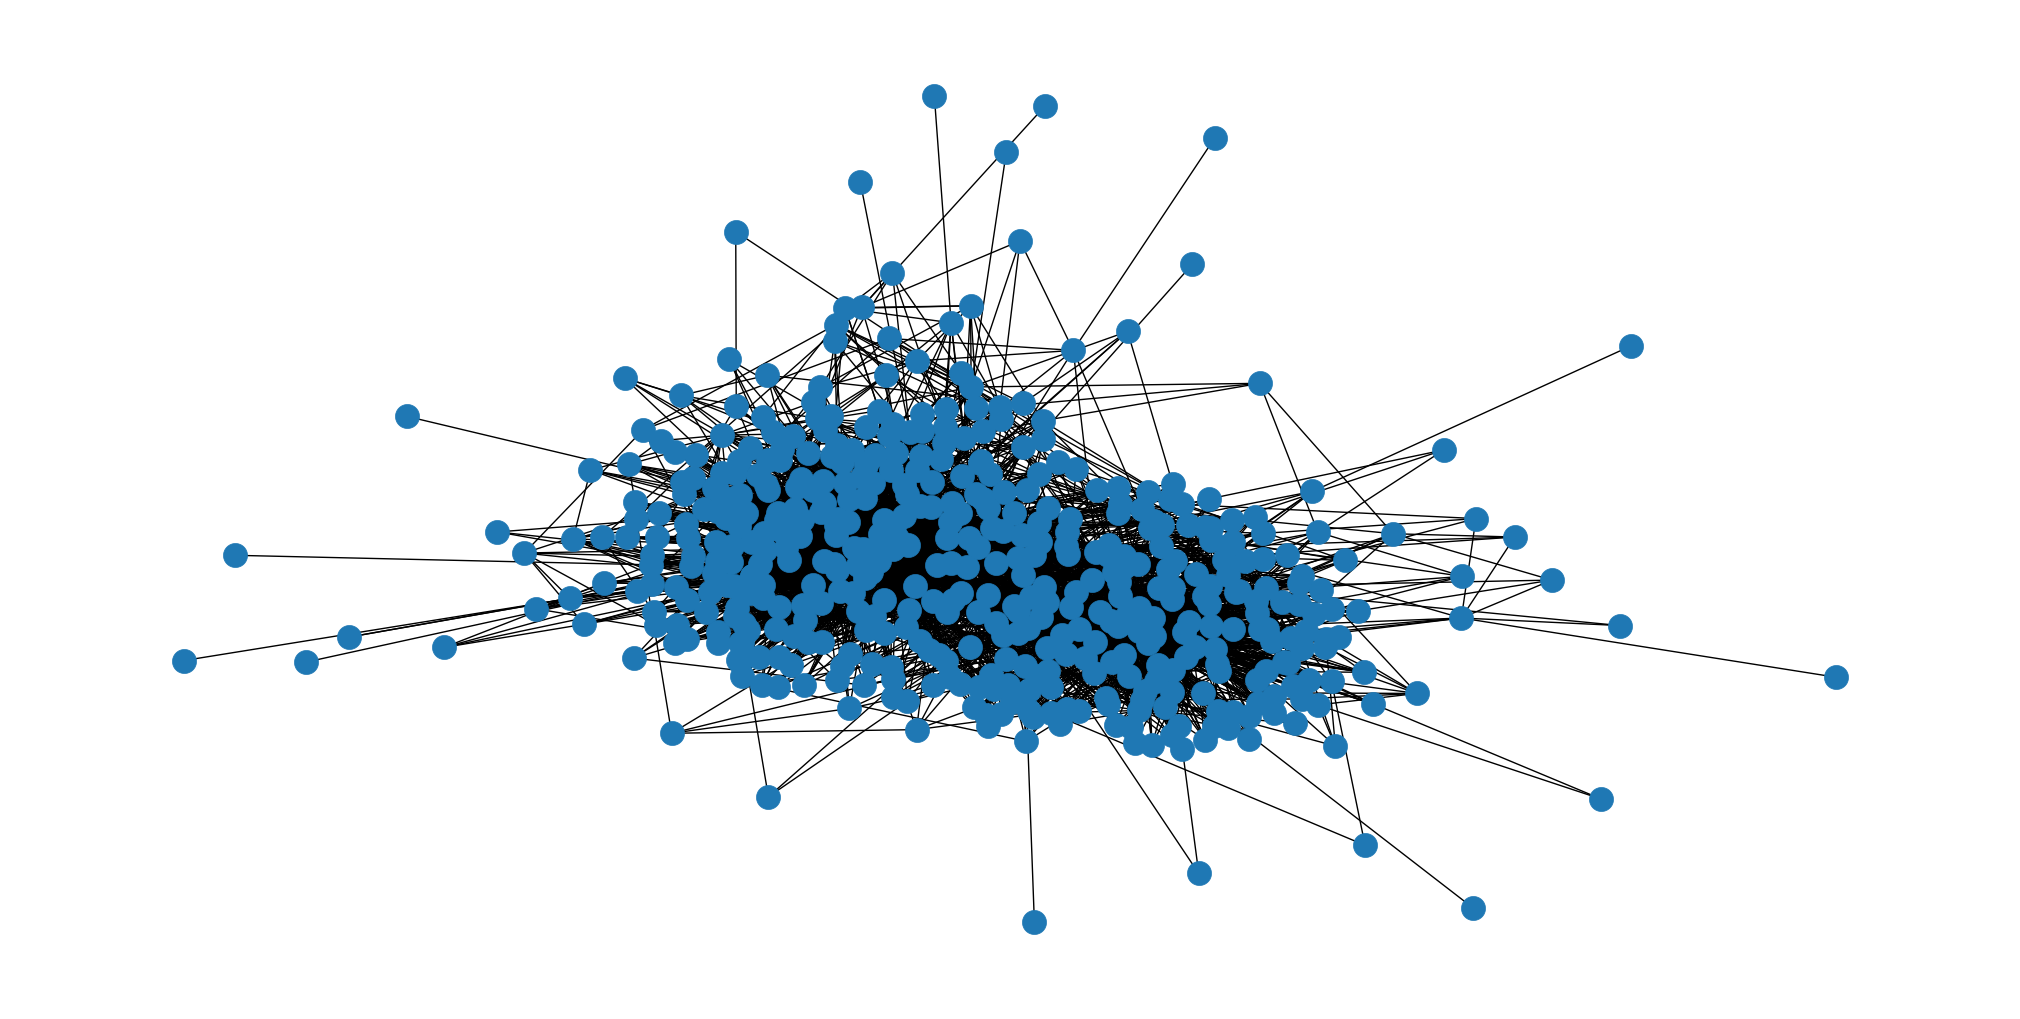

In [ ]:
#basic info
print(influencers_sub_graph.number_of_nodes())
print(influencers_sub_graph.number_of_edges())
# print(nx.info(influencers_sub_graph))
#check density
print("The density of the graph is ",nx.density(influencers_sub_graph))

nx.draw(influencers_sub_graph, pos=nx.spring_layout(influencers_sub_graph))

## 网络可视化

### Spring layout

In [ ]:
# create the layout
pos = nx.spring_layout(influencers_sub_graph)

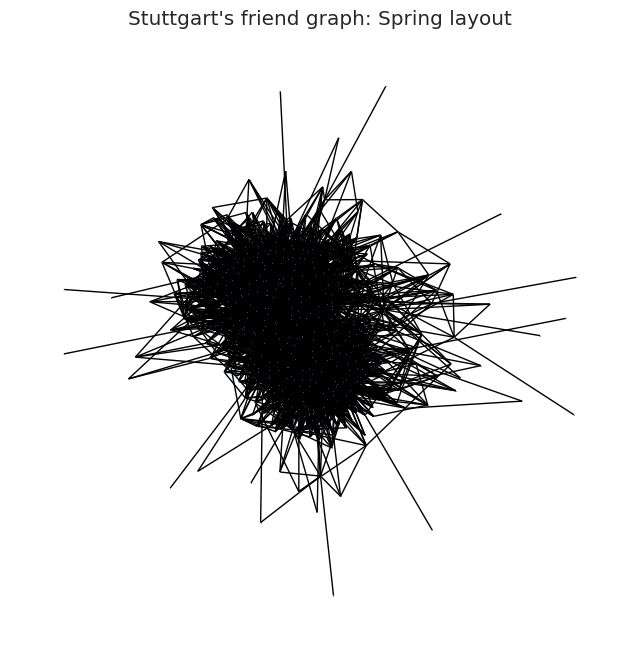

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Stuttgart's friend graph: Spring layout")
nx.draw(influencers_sub_graph, pos=pos, node_size=0.05, width=1)

上面的图表结构显示了斯图加特的用户群及其联系。

让我们探索 networkx 可能的其他视图


### Circular/Circos布局

Spring布局
Circular/Circos布局
随机布局
Kamada-Kawai布局


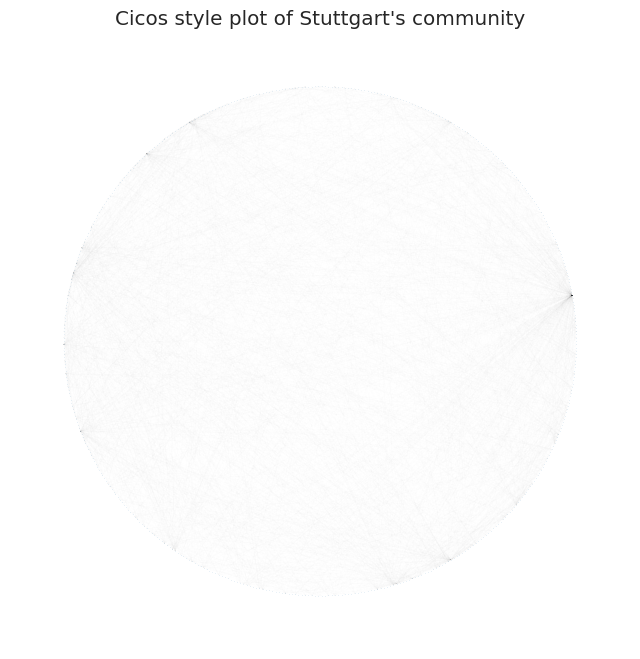

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Cicos style plot of Stuttgart's community")
#https://stackoverflow.com/questions/21978487/improving-python-networkx-graph-layout
nx.draw_circular(influencers_sub_graph,node_size=0.001, width=0.001)

### 随机布局

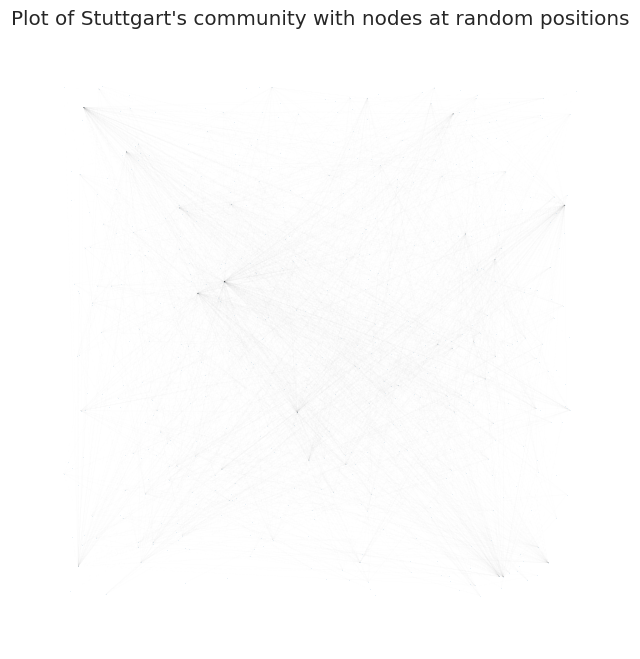

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Plot of Stuttgart's community with nodes at random positions")
#https://stackoverflow.com/questions/21978487/improving-python-networkx-graph-layout
nx.draw_random(influencers_sub_graph,node_size=0.001, width=0.001)

### Kamada-Kawai布局

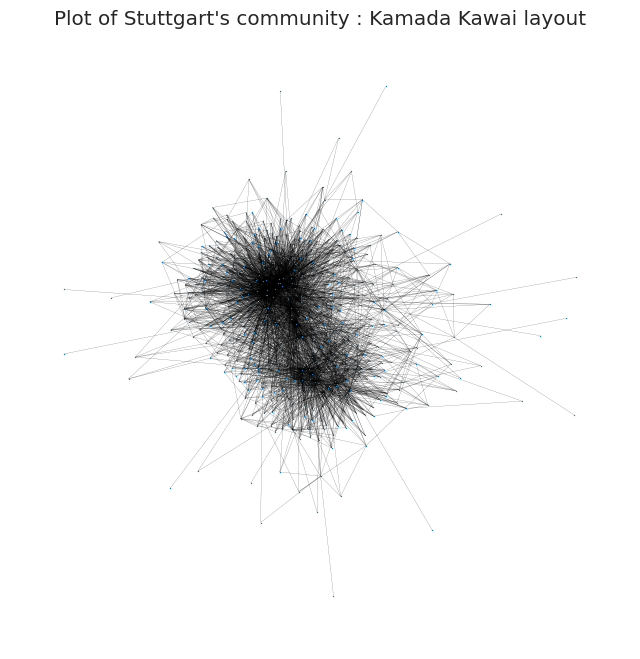

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Plot of Stuttgart's community : Kamada Kawai layout")
pos2=nx.kamada_kawai_layout(influencers_sub_graph)
nx.draw(influencers_sub_graph, pos=pos, node_size=0.2, width=0.1)

## 社区检测

找出斯图加特有影响力的潜在社区，将检测到的社区覆盖在图表的 spring 布局上

In [ ]:
# pip install python-louvain

In [ ]:
#community detection -- Done in 3 lines :p
import community.community_louvain as community
parts = community.best_partition(influencers_sub_graph)
values = [parts.get(node) for node in influencers_sub_graph.nodes()]

print(len(set(values))," Communities have been identified")

5  Communities have been identified


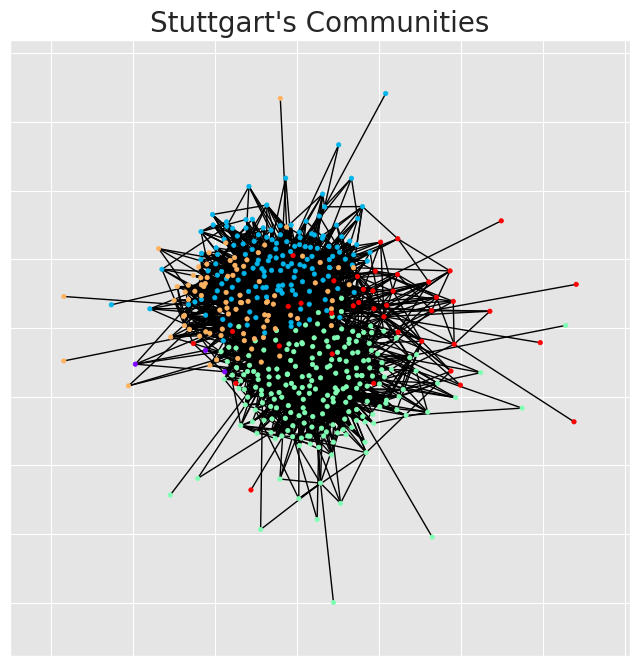

In [ ]:
plt.figure(figsize=(8,8))
plt.axes=False
plt.title("Stuttgart's Communities",fontsize=20)
nx.draw_networkx(influencers_sub_graph,
                 pos = pos,cmap = plt.get_cmap("rainbow"),
                 node_color = values,
                 node_size = 10,
                 with_labels = False)

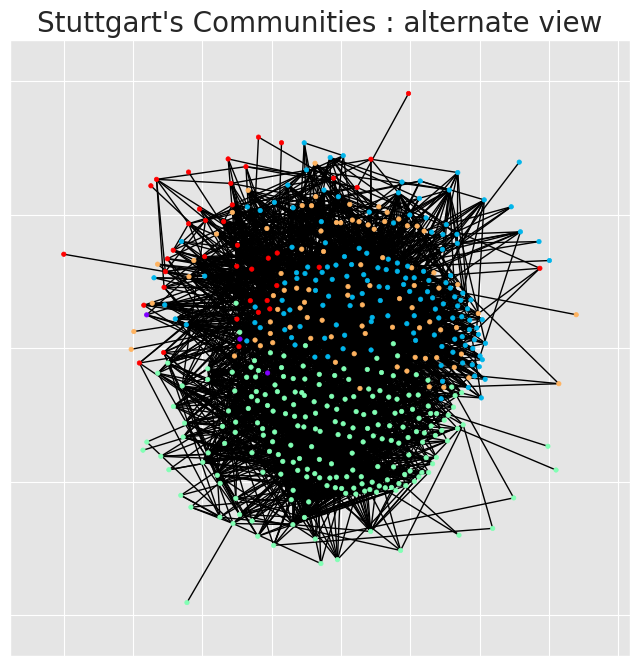

In [ ]:
plt.figure(figsize=(8,8))
plt.axes=False
plt.title("Stuttgart's Communities : alternate view",fontsize=20)
nx.draw_networkx(influencers_sub_graph, pos = pos2,cmap = plt.get_cmap("rainbow"), node_color = values, node_size = 10, with_labels = False)